<center>
<h4>Diplomatura Datos 2021 - FaMAF - UNC</h4>
<h1>Aplicando Machine Learning para predicción de demanda</h1>
<h3>Exploración y Curación</h3>
</center>
</left>
<h4>Dario Yvanoff</h4>
</left>

[Proyecto para Mentoría](https://sites.google.com/view/mentorias2021-diplodatos/aplicando-machine-learning-para-predicci%C3%B3n-de-demanda?authuser=0)

# Objetivo 

El objetivo final de la mentoría es poder predecir el próximo mes de venta de productos en los diferentes países y zonas en donde opera la compañía de retail proveedora de los datasets. Concretamente vamos a intentar predecir el proximo mes para una localidad dada. Sin embargo, los prácticos que se realizarán en esta mentoría son aplicables a compañías de cualquier vertical de negocio que quiera predecir la demanda.

¿Cuáles serían los productos mas vendidos el próximo mes en cada localidad, provincia y país?

¿Cuánto de cada producto se vendería el próximo mes en cada localidad, provincia y país?

¿Cuándo convendría comenzar la distribución de cada producto a los almacenes más cercanos del consumidor?

¿Qué productos se venderían juntos? Identificamos clusters de productos que pueden distribuirse conjuntamente antes que efectivamente se compren.

### Información Importante

En la presente notebook, se presentará la consigna a seguir para el segundo práctico correspondiente a la materia Exploración y Curación. En esta notebook se enumeran las consignas que permitirán implementar los pasos necesarios para explorar en mayor profundidad la información, proceder a la limpieza del dataset y generar un dataset resultante que servirá de input para los futuros prácticos de ML. 

Cada grupo debe armar un repositorio git o agregar al repositorio existente con el trabajo de Exploración y Curación de la mentoría. En dicho repositorio deben presentar:
- una notebook respondiendo las consignas de este práctico
- un archivo python que se pueda correr desde el sistema operativo (Ej: python nombre_archivo.py) y que ejecute la lectura de los datos, la curación del dataset aplicando los pasos del checklist, el enriquecimiento del dataset con nuevas columnas y la generación del archivo final comprimido.
- un informe (formato html, ppt o pdf) con las respuestas de este práctico. Dicho informe servirá de base para obtener la información a presentar en los videos intermedio y final de la mentoria. 

Se recomienda que el informe tenga las siguientes secciones:
- Introducción 
- Respuestas a los puntos del práctico
- Principales conclusiones

#### Nota: 
Es muy importante no solo resolver las consignas técnicamente sino tambien tener la claridad en la comunicación de los hallazgos, exponer las conclusiones y tener poder de síntesis. Se valorará que la presentación sea acompañada de los gráficos adecuados en las consignas que corresponda. Cuando se agreguen al informe, los graficos deben hablar por si mismos.

### Entregables 

Fecha de Entrega de este practico y el informe de Exploración y Curación: 4/7/2021

# 0. Importacion de librerías

In [1]:
# Importación de las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pandas_profiling
import sys
import chardet

In [2]:
pd.set_option('display.max_columns', 150)
pd.set_option('max_colwidth', 151)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)  

# Consigna para Informe de Exploración y Curación

## 1- Curación de datos

Este practico consistirá en aplicar el checklist de limpieza de datos que se encuentra en https://dimewiki.worldbank.org/wiki/Checklist:_Data_Cleaning conjuntamente con la verificación de la consistencia de la información. Cada decisión tomada en la aplicación del checklist de limpieza deberá quedar documentada claramente. 

Si se considera conveniente y de utilidad, cada grupo podrá enriquecer el conjunto de datos con información externa al mismo. Los datos a incorporar en el dataset deberán ser aquellos que se intuya puedan tener una relación con el comportamiento de compra de congelados de los consumidores tales como densidad de población por localidad, feriados nacionales o temperaturas en días previos (ejemplos no exhaustivo de features que puedan determinar el comportamiento de compra). Este proceso de enriquecimiento podrá ser iterativo y podrá continuar mientras se realicen los experimentos de machine learning en los próximos prácticos.

Como se mencionó anteriormente el dataset resultante aqui servirá de entrada a los futuros modelos de aprendizaje automático (ML). 

Se propone contestar cada uno de los puntos expuestos en esta notebook generando una rutina python de manera que puedan ser llamados desde el sistema operativo que dispongan. Dicha rutina debe contemplar desde la lectura de los dataset, pasando por cada punto del checklist de limpieza hasta la grabación del dataset resultante en un archivo pkl. 

### Checklist Data Cleaning

### 1- Importación Datos

#### 1.1. Verificación de Inexistencia de Problemas en la Importación

In [3]:
#from google.colab import drive

#drive.mount('/content/gdrive')

In [4]:
# Lectura del dataset Productos
productos = pd.read_csv('./dataset/productos.zip', delimiter=';', encoding='latin-1')

# Lectura del dataset Categorias
categorias = pd.read_csv('./dataset/categorias.zip', delimiter=';', encoding='latin-1')

# Lectura del dataset Punto de Venta
pdv = pd.read_csv('dataset/puntos_de_venta.zip', delimiter=';', encoding='latin-1')

# Lectura del dataset Ventas
ventas = pd.read_csv('dataset/ventas.zip', delimiter=';', encoding='latin-1')

# Lectura del dataset Paises, Provincias y Localidades
paises = pd.read_csv('dataset/paises.zip', delimiter=';', encoding='latin-1')
provincias = pd.read_csv('dataset/provincias.zip', delimiter=';', encoding='latin-1')
localidades = pd.read_csv('dataset/localidades.zip', delimiter=';', encoding='latin-1')

In [5]:
#Otra manera de correr (DG)

# Lectura del dataset Productos
#productos = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Mentoria/Entregable 2/dataset/productos.zip', delimiter=';', encoding='latin-1')

# Lectura del dataset Categorias
#categorias = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Mentoria/Entregable 2/dataset/categorias.zip', delimiter=';', encoding='latin-1')

# Lectura del dataset Punto de Venta
#pdv = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Mentoria/Entregable 2/dataset/puntos_de_venta.zip', delimiter=';', encoding='latin-1')

# Lectura del dataset Ventas
#ventas = pd.read_csv('ventas.zip', delimiter=';', encoding='latin-1')

# Lectura del dataset Paises, Provincias y Localidades
#paises = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Mentoria/Entregable 2/dataset/paises.zip', delimiter=';', encoding='latin-1')
#provincias = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Mentoria/Entregable 2/dataset/provincias.zip', delimiter=';', encoding='latin-1')
#localidades = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Mentoria/Entregable 2/dataset/localidades.zip', delimiter=';', encoding='latin-1')

In [6]:
# Creamos el campo fecha
ventas['fecha'] = ventas['anio'].astype(str) + '-' + ventas['mes'].astype(str).str.zfill(2) + '-' + ventas['dia'].astype(str).str.zfill(2)

# Convertimos a datetime el atributo fecha
ventas['fecha'] = pd.to_datetime(ventas['fecha'], format='%Y-%m-%d')

In [7]:
# Correcciones de precios informados por el negocio
productos.loc[productos.sku==3170,'unidadkg']="2.565"
productos.loc[productos.sku==3171,'unidadkg']="2.565"
productos.loc[productos.sku==12150,'unidadkg']="8.325"
productos.loc[productos.sku==3095,'unidadkg']="786.72"
productos.loc[productos.sku==22660,'unidadkg']="0.6"

In [8]:
productos.head()

,sku,descripcion,marca,id_categoria,presentacion,unidadcm3,unidadkg,id_proveedor
0,223,PACKXX-XX-X-XXXRIDO,GRIDO,58,Pack,0.64,3.31,2
1,224,PACKXX-XX-X-XXXRIDO,GRIDO,57,Pack,0.77,4.22,2
2,225,PACKXX-XX-X-XXXBANA,VIA BANA,40,Pack,0.59,3.31,2
3,226,PACKXX-XX-X-XXXBANA,VIA BANA,40,Pack,0.70,4.22,2
4,227,PACKXX-XX-X-XXXBANA,VIA BANA,40,Pack,5.00,5.00,2


In [9]:
productos.shape

(4352, 8)

In [10]:
# Vemos los tipos de datos
productos.dtypes.to_frame()

,0
sku,int64
descripcion,object
marca,object
id_categoria,int64
presentacion,object
unidadcm3,float64
unidadkg,object
id_proveedor,int64


In [11]:
categorias.head()

,id_categoria,nombre
0,35,05 - Pack Impulsivos Grido
1,36,07 - Pack Potes Grido
2,37,06 - Pack Postres/Tortas Grido
3,38,000 - GRIDO MIX
4,39,08 - Otros.


In [12]:
categorias.shape

(88, 2)

In [13]:
# Vemos los tipos de datos
categorias.dtypes.to_frame()

,0
id_categoria,int64
nombre,object


In [14]:
pdv.head()

,id_punto_venta,nombre,id_Provincia,id_Localidad,id_Pais
0,100001,MONXXX-XX-XXSTO,5,1890,1
1,100002,SAMXXX-XX-XXCHO,5,2018,1
2,100003,VA.XXX-XX-XXE I,5,2124,1
3,100003-1,VILXXX-XX-XXIII,5,2124,1
4,100004,SUCXXX-XX-XXCRE,18,4263,1


In [15]:
pdv.shape

(1850, 5)

In [16]:
# Vemos los tipos de datos
pdv.dtypes.to_frame()

,0
id_punto_venta,object
nombre,object
id_Provincia,int64
id_Localidad,int64
id_Pais,int64


In [17]:
ventas.head()

,dia,mes,anio,hora,sku,cantidad_pedida,id_punto_venta,fecha
0,4,1,2018,15:05:34.0000000,3071,1.00,100000,2018-01-04
1,4,1,2018,15:05:34.0000000,1872,4.00,100000,2018-01-04
2,4,1,2018,15:05:34.0000000,2008,4.00,100000,2018-01-04
3,4,1,2018,15:05:34.0000000,2009,4.00,100000,2018-01-04
4,4,1,2018,15:05:34.0000000,1918,4.00,100000,2018-01-04


In [18]:
ventas.shape

(5666365, 8)

In [19]:
# Vemos los tipos de datos
ventas.dtypes.to_frame()

,0
dia,int64
mes,int64
anio,int64
hora,object
sku,int64
cantidad_pedida,float64
id_punto_venta,object
fecha,datetime64[ns]


In [20]:
paises.head()

,id_Pais,nombre
0,1,Argentina
1,2,Chile
2,3,Uruguay
3,5,Paraguay
4,7,Bolivia


In [21]:
paises.shape

(5, 2)

In [22]:
# Vemos los tipos de datos
paises.dtypes.to_frame()

,0
id_Pais,int64
nombre,object


In [23]:
provincias.head()

,id_Provincia,nombre
0,5,Córdoba
1,11,La Rioja
2,20,Santa Fe
3,21,Santiago del Estero
4,2,Catamarca


In [24]:
provincias.shape

(78, 2)

In [25]:
# Vemos los tipos de datos
provincias.dtypes.to_frame()

,0
id_Provincia,int64
nombre,object


In [26]:
localidades.head()

,id_Localidad,nombre
0,2,Córdoba
1,1737,La Calera
2,2124,Villa Allende
3,1431,Alta Gracia
4,1599,Deán Funes


In [27]:
localidades.shape

(897, 2)

In [28]:
# Vemos los tipos de datos
localidades.dtypes.to_frame()

,0
id_Localidad,int64
nombre,object


**Nota:** en este punto tenemos los dataframe listos para continuar con el proceso de curación de datos

#### 1.2. Asegurar la Existencia de IDs o Claves Únicas

En esta sección se chequea que no existen datos duplicados y que las claves, si existen, son únicas.

Esto debemos hacerlo sobre las entidades de **productos** y de **pdv**. Deberíamos tener un único sku por productos y id por punto de venta.

Definimos sku como indice de productos

In [29]:
a = productos.set_index('sku')

Verificamos que no haya indices duplicados para sucurales

In [30]:
len(a[a.index.duplicated()])

0

Nota: Como se observa no tenemos sku duplicados en productos

Definimos id_punto_venta como indice de punto de venta

In [31]:
b = pdv.set_index('id_punto_venta')

In [32]:
b[b.index.duplicated()]

,nombre,id_Provincia,id_Localidad,id_Pais
id_punto_venta,,,,


Nota: Como se observa no tenemos id_punto_venta duplicados en punto de venta

#### 1.3. Despersonalizar Datos y Guardarlos en un Nuevo Archivo

En este caso, no es necesario despersonalizar ningún dato, dado que las columnas con información sensible ya nos han sido provistas enmascaradas.

#### 1.4. Nunca Modificar los Datos Crudos u Originales

Al finalizar la limpieza, deberán guardar el dataset resultante en un nuevo archivo, para asegurarse de no modificar los datos originales.

### 2. Pasos Importantes para limpieza de Datos

#### 2.1. Etiquetas de Variables/Columnas y Problemas de Codificación/Encoding

Verificamos el encoding de la fuente de datos. Tomamos primeros 100000 caracteres, por ejemplo:

In [33]:
productos.index

RangeIndex(start=0, stop=4352, step=1)

In [34]:
from zipfile import ZipFile
with ZipFile('./dataset/productos.zip') as myzip:
    with myzip.open('productos.csv') as f:
        data = f.read()
        print(chardet.detect(data))

{'encoding': 'Windows-1252', 'confidence': 0.7295995137308687, 'language': ''}


**A responder:**  analizar el encoding de las demás fuentes de datos para asegurarse que todos tienen el mismo juego de caracteres y por tanto se le puede dar el mismo tratamiento.

In [35]:
with ZipFile('./dataset/categorias.zip') as myzip:
    with myzip.open('categorias.csv') as f:
        data = f.read()
        print(chardet.detect(data))

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [36]:
with ZipFile('./dataset/puntos_de_venta.zip') as myzip:
    with myzip.open('puntos_de_venta.csv') as f:
        data = f.read()
        print(chardet.detect(data))

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [37]:
with ZipFile('./dataset/ventas.zip') as myzip:
    with myzip.open('ventas.csv') as f:
        data = f.read()
        print(chardet.detect(data))

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [38]:
with ZipFile('./dataset/paises.zip') as myzip:
    with myzip.open('paises.csv') as f:
        data = f.read()
        print(chardet.detect(data))

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [39]:
with ZipFile('./dataset/provincias.zip') as myzip:
    with myzip.open('provincias.csv') as f:
        data = f.read()
        print(chardet.detect(data))

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [40]:
with open('./dataset/productos.csv',"rb") as f:
    data = f.read()
    print(chardet.detect(data))

{'encoding': 'Windows-1252', 'confidence': 0.7295995137308687, 'language': ''}


In [41]:
with ZipFile('./dataset/localidades.zip') as myzip:
    with myzip.open('localidades.csv') as f:
        data = f.read()
        print(chardet.detect(data))

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


Analizamos los nombres de columnas utilizando la siguiente expresión `df.columns.str.extract(r'^(\w+)$')`.

In [42]:
ventas.columns.values

array(['dia', 'mes', 'anio', 'hora', 'sku', 'cantidad_pedida',
       'id_punto_venta', 'fecha'], dtype=object)

In [43]:
ventas.columns.str.match(r'^(\w+)$')

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [44]:
productos.columns.values

array(['sku', 'descripcion', 'marca', 'id_categoria', 'presentacion',
       'unidadcm3', 'unidadkg', 'id_proveedor'], dtype=object)

In [45]:
productos.columns[~productos.columns.str.match(r'^(\w+)$')]

Index([], dtype='object')

In [46]:
pdv.columns.values

array(['id_punto_venta', 'nombre', 'id_Provincia', 'id_Localidad',
       'id_Pais'], dtype=object)

In [47]:
pdv.columns[~pdv.columns.str.match(r'^(\w+)$')]

Index([], dtype='object')

In [48]:
categorias.columns.values

array(['id_categoria', 'nombre'], dtype=object)

In [49]:
categorias.columns[~categorias.columns.str.match(r'^(\w+)$')]

Index([], dtype='object')

In [50]:
paises.columns.values

array(['id_Pais', 'nombre'], dtype=object)

In [51]:
paises.columns[~paises.columns.str.match(r'^(\w+)$')]

Index([], dtype='object')

In [52]:
provincias.columns.values

array(['id_Provincia', 'nombre'], dtype=object)

In [53]:
provincias.columns[~provincias.columns.str.match(r'^(\w+)$')]

Index([], dtype='object')

In [54]:
localidades.columns.values

array(['id_Localidad', 'nombre'], dtype=object)

In [55]:
localidades.columns[~localidades.columns.str.match(r'^(\w+)$')]

Index([], dtype='object')

**Nota:** Como se observa las entidades no tienen caracteres fuera de a-Z, 0-9 y _ en los nombres de columnas

#### 2.2. Tratamiento de Valores Faltantes

A responder: analizar las demas entidades para verificar datos faltantes o situaciones similares a la de presentación de productos y documentar las decisiones tomadas. Se podrían completar los valores faltantes?

##### productos

Identificamos cuantos valores faltantes existen por feature y cuánto representan del total. Por ejemplo, para el dataset de productos:

In [56]:
# Verificamos si tiene valores Nan
productos.isnull().sum().to_frame()

,0
sku,0
descripcion,0
marca,0
id_categoria,0
presentacion,0
unidadcm3,0
unidadkg,0
id_proveedor,0


In [57]:
productos.marca.value_counts()

SIN DEFINIR    2804
GRIDO          1158
VIA BANA        328
FRIZZIO          62
Name: marca, dtype: int64

In [58]:
productos.presentacion.value_counts()

Pack           2371
Unidades       1106
No Asignada     576
Kilogramos      148
Baldes          136
                 15
Name: presentacion, dtype: int64

In [59]:
productos.unidadkg.value_counts()

0.00      2433
5.00       795
7.80        86
4.14        63
0.17        62
          ... 
709.50       1
714.67       1
268.96       1
718.33       1
5.06         1
Name: unidadkg, Length: 290, dtype: int64

In [60]:
#Obtenemos los indices de las filas que tienen registros con valores string vacíos
indices = np.where(productos.applymap(lambda x: x == ' '))[0]
indices

array([ 163,  164,  175,  186,  268,  335,  389,  453,  460,  473,  475,
        553,  554, 1212, 1215], dtype=int64)

In [61]:
# Mostramos algunos ejemplos de filas que tienen presentaciones vacías desde los índices obtenidos en la celda anterior
ejemplos = productos[productos.index.isin(indices)]
ejemplos

,sku,descripcion,marca,id_categoria,presentacion,unidadcm3,unidadkg,id_proveedor
163,386,MESAXX-XX-X-XXXRIOR,SIN DEFINIR,64,,5.00,5.00,3
164,387,SERVXX-XX-X-XXXNOX.,SIN DEFINIR,64,,5.00,5.00,3
175,398,BALAXX-XX-X-XXX kg.,SIN DEFINIR,64,,5.00,5.00,3
186,409,MESAXX-XX-X-XXX0.40,SIN DEFINIR,64,,5.00,5.00,3
268,491,PULVXX-XX-X-XXX1 LT,SIN DEFINIR,64,,5.00,5.00,3
335,558,CUCUXX-XX-X-XXXnid.,SIN DEFINIR,64,,5.00,5.00,3
389,612,CRISXX-XX-X-XXXRAME,SIN DEFINIR,64,,0.00,2.11,3
453,676,CONFXX-XX-X-XXXgrs.,SIN DEFINIR,64,,5.00,5.00,3
460,683,CHAMXX-XX-X-XXX CC.,SIN DEFINIR,64,,5.00,5.00,3
473,696,VASOXX-XX-X-XXXnid.,GRIDO,64,,5.00,5.00,3


In [62]:
total_prod=len(productos)
print("Porcentaje de presentaciones vacias: {0:.4f}% de un total de {1:} productos distintos".format(15/total_prod,total_prod))

Porcentaje de presentaciones vacias: 0.0034% de un total de 4352 productos distintos


Como se puede observar existen presentaciones que no son nulos pero que tampoco son NaN. Tener en cuenta este hecho en el análisis y decisiones que se tomen al respecto en cada práctico.

In [63]:
# De los que no tienen presentacion, solo estan presentes el 1500 y el 1503 que por lo menos tienen la marca
ventas[ventas.sku.isin(list(ejemplos.sku))].value_counts('sku')

sku
1503    1129
1500     751
dtype: int64

##### categorias

In [64]:
# Verificamos si tiene valores Nan
categorias.isnull().sum().to_frame()

,0
id_categoria,0
nombre,0


In [65]:
categorias.nombre.value_counts().to_frame()[:20]

,nombre
VACIO,5
12 - MUEBLES,2
09 - SABORES PREMIUM,1
05 - Mix 40 GRANEL/60 IMP,1
"0002 - ACCESORIOS, UTENSILIOS Y REPUESTOS",1
07 - Pack Potes Grido,1
"10 - CARTELERIA, INSTITUCIONALES Y PLOTEOS",1
12 - IMPULSIVOS,1
0001 - GRIDO MARKET,1
19 - MATERIAS PRIMAS,1


In [66]:
#Obtenemos los indices de las filas que tienen registros con valores string vacíos
indices = np.where(categorias.applymap(lambda x: x == 'VACIO' or x=='vacia'))[0]
indices

array([32, 40, 41, 45, 47, 48], dtype=int64)

In [67]:
# Mostramos algunos ejemplos de filas que tienen presentaciones vacías desde los índices obtenidos en la celda anterior
productos[productos.index.isin([163,164])]

,sku,descripcion,marca,id_categoria,presentacion,unidadcm3,unidadkg,id_proveedor
163,386,MESAXX-XX-X-XXXRIOR,SIN DEFINIR,64,,5.00,5.00,3
164,387,SERVXX-XX-X-XXXNOX.,SIN DEFINIR,64,,5.00,5.00,3


In [68]:
# Mostramos algunos ejemplos de filas que tienen presentaciones vacías desde los índices obtenidos en la celda anterior
ejemplos = categorias[categorias.index.isin(indices)]
ejemplos

,id_categoria,nombre
32,67,VACIO
40,75,vacia
41,76,VACIO
45,80,VACIO
47,83,VACIO
48,84,VACIO


In [69]:
total_cat=len(categorias)
print("Porcentaje de nombres vacios: {0:.4f}% de un total de {1:} categorias distintas".format(len(indices)/total_cat,total_cat))

Porcentaje de nombres vacios: 0.0682% de un total de 88 categorias distintas


In [70]:
# Estas categorias vacias no van a ser un problema porque no hay ningun producto pertenecientes a esas categorias:
productos[productos.id_categoria.isin(list(ejemplos.id_categoria))]

,sku,descripcion,marca,id_categoria,presentacion,unidadcm3,unidadkg,id_proveedor


##### pdv

In [71]:
# Verificamos si tiene valores Nan
pdv.isnull().sum().to_frame()

,0
id_punto_venta,0
nombre,0
id_Provincia,0
id_Localidad,0
id_Pais,0


In [72]:
pdv.nombre.value_counts().to_frame()[:5]

,nombre
SANXXX-XX-XX II,22
SANXXX-XX-XXIII,20
VILXXX-XX-XX II,15
VILXXX-XX-XXIII,7
SALXXX-XX-XXIII,6


In [73]:
pdv.id_punto_venta.value_counts().to_frame()[:5]

,id_punto_venta
101278,1
100238-2,1
100322,1
101208,1
100555,1


In [74]:
pdv.id_Provincia.value_counts().to_frame()[:5]

,id_Provincia
1,509
5,372
20,157
23,95
7,76


In [75]:
pdv.id_Localidad.value_counts().to_frame()[:5]

,id_Localidad
2,174
3,56
635,35
3920,32
4742,28


In [76]:
pdv.id_Pais.value_counts().to_frame()

,id_Pais
1,1849
3,1


In [77]:
nombres = list(pdv.nombre.value_counts().to_frame().index)
nombres.sort()

No existen datos faltantes

##### ventas

In [78]:
# Verificamos si tiene valores Nan
ventas.isnull().sum().to_frame()

,0
dia,0
mes,0
anio,0
hora,0
sku,0
cantidad_pedida,0
id_punto_venta,0
fecha,0


In [79]:
ventas.hora.value_counts()

16:10:51.0000000    821
16:10:24.0000000    794
16:08:04.0000000    793
16:08:25.0000000    774
16:14:47.0000000    762
                   ... 
21:10:55.6200000      1
09:12:33.5100000      1
18:23:03.1530000      1
07:30:56.0000000      1
20:09:22.4970000      1
Name: hora, Length: 88349, dtype: int64

In [80]:
ventas.sku.value_counts()

1689     84943
334      81849
1693     79430
1695     78095
1687     77870
         ...  
384          4
9282         2
11407        1
6080         1
10985        1
Name: sku, Length: 588, dtype: int64

In [81]:
ventas.cantidad_pedida.value_counts()

1.00      1783757
2.00      1346949
3.00       671095
4.00       441428
5.00       393438
           ...   
329.00          1
238.00          1
-5.00           1
205.00          1
290.00          1
Name: cantidad_pedida, Length: 265, dtype: int64

In [82]:
ventas.id_punto_venta.value_counts()

100147      12282
100697      11437
100747      11133
100914      11063
100351      10687
            ...  
100650-3        2
100257-3        1
100632-2        1
100107-5        1
100650-6        1
Name: id_punto_venta, Length: 1796, dtype: int64

In [83]:
ventas.fecha.value_counts() #365*2=730

2018-12-16    33469
2019-11-17    31492
2018-11-11    30797
2019-01-27    30236
2019-02-10    29902
              ...  
2018-06-23      271
2018-07-14      267
2018-06-02      259
2019-06-29      254
2018-06-16      199
Name: fecha, Length: 730, dtype: int64

No hay datos faltantes

##### paises

In [84]:
# Verificamos si tiene valores Nan
paises.isnull().sum().to_frame()

,0
id_Pais,0
nombre,0


In [85]:
paises.id_Pais.value_counts()

1    1
2    1
3    1
5    1
7    1
Name: id_Pais, dtype: int64

In [86]:
paises.nombre.value_counts()

Argentina    1
Paraguay     1
Uruguay      1
Bolivia      1
Chile        1
Name: nombre, dtype: int64

No hay datos faltantes

##### provincias

In [87]:
# Verificamos si tiene valores Nan
provincias.isnull().sum().to_frame()

,0
id_Provincia,0
nombre,0


In [88]:
provincias.id_Provincia.value_counts()[10:]

79     1
64     1
63     1
61     1
59     1
      ..
26     1
25     1
24     1
23     1
124    1
Name: id_Provincia, Length: 68, dtype: int64

In [89]:
provincias.nombre.value_counts()[10:]

Neuquén            1
Quillota           1
Guairá             1
Capital Federal    1
Maipo              1
                  ..
Florida            1
Córdoba            1
Alto Paraná        1
Central            1
Santa Fe           1
Name: nombre, Length: 64, dtype: int64

In [90]:
#Obtenemos los indices de las filas que tienen registros con ..
indices = np.where(provincias.applymap(lambda x: x == 'Misiones' or x == 'Río Negro'))[0]
indices

array([15, 17, 48, 64], dtype=int64)

In [91]:
ejemplos = provincias[provincias.index.isin(indices)]
ejemplos

,id_Provincia,nombre
15,15,Río Negro
17,13,Misiones
48,40,Río Negro
64,74,Misiones


In [92]:
pdv[pdv.id_Provincia.isin(list(ejemplos.id_Provincia))].value_counts('id_Provincia')

id_Provincia
13    39
15    32
dtype: int64

No hay datos faltantes pero hay nombres de provincias repetidas. Una suposición es que pertenecen a países distintos. De todas maneras, no será necesario la imputación dado que en el dataset de pdv aparecen con un sólo id_Provincia, probablmente porque hay un sólo país en el dataset.


##### localidades

In [93]:
# Verificamos si tiene valores Nan
localidades.isnull().sum().to_frame()

,0
id_Localidad,0
nombre,0


In [94]:
localidades.id_Localidad.value_counts()

2       1
6220    1
5458    1
5460    1
5461    1
       ..
2678    1
4727    1
633     1
634     1
6143    1
Name: id_Localidad, Length: 897, dtype: int64

In [95]:
localidades.nombre.value_counts()

San Lorenzo                           4
La Paz                                3
La Florida                            2
Rawson                                2
Lampa                                 2
                                     ..
3 De Febrero, Remedios De Escalada    1
Toay                                  1
Loreto Villa San Martin               1
San Fernando, Canal San Fernando      1
Avellaneda, Sarandi                   1
Name: nombre, Length: 872, dtype: int64

No hay datos faltantes

#### 2.3. Codificación de Variables Categóricas

**Responder:** Aplica codificar variables categóricas?

Para las aplicaciones de Aprendizaje Automático las variables categóricas deben codificarse. 
Dentro de los métodos empleados usualmente para variables categóricas nominales esta One Hot Encoding (ver más desarrollo en informe).

#### 2.4. No Cambiar los Nombres de las Variables de la Fuente de Origen

#### 2.5. Verificación de Consistencia de Datos

Aplicar las reglas de integridad correspondientes y documentar las decisiones tomadas.

Este punto se encuentra desarrollando en el inciso 4.1 del presente notebook.

#### 2.6. Identificar y Documentar Valores Atípicos/Outliers

Calcular estadísticos y eliminar los outliers utilizando el metodo que considere pertinentes (z-score, z-score modificado o IRQ) justificando y documentando la elección realizada. Realizar el análisis sobre la columna cantidad_pedida


count   5666365.00
mean          4.49
std          73.35
min         -23.00
25%           1.00
50%           2.00
75%           5.00
max       99997.00
Name: cantidad_pedida, dtype: float64


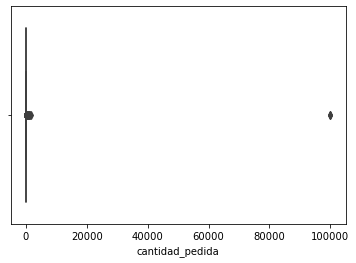

In [96]:
#Estadistica descriptiva de cantidad_pedida
print(ventas.cantidad_pedida.describe())
fig = sns.boxplot(x=ventas.cantidad_pedida)

count   5666362.00
mean          4.44
std           9.29
min         -23.00
25%           1.00
50%           2.00
75%           5.00
max        1520.00
Name: cantidad_pedida, dtype: float64
Se eliminaron 3 filas


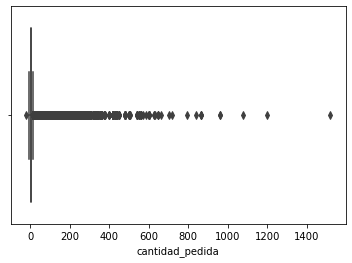

In [97]:
zoom = ventas[ventas['cantidad_pedida']<50000]
print(zoom.cantidad_pedida.describe())
print('Se eliminaron', len(ventas) - len(zoom), 'filas')
fig = sns.boxplot(x=zoom.cantidad_pedida)

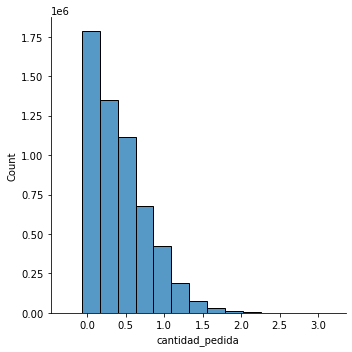

In [98]:
#La distribución es asimétrica aún en escala logarítmica por lo que se requiere utilizar métodos no parámetricos (IQR, Percentiles, etc)
sns.displot(x=np.log10(zoom[zoom.cantidad_pedida>0].cantidad_pedida), bins=15)

In [99]:
#Detección a través de Z Score
def outliers_z_score(df, col, threshold=3):
    threshold = threshold
    mean_y = np.mean(df[col])
    stdev_y = np.std(df[col])
    z_scores = [(y - mean_y) / stdev_y for y in df[col]]
    return df[df.index.isin(list(np.where(np.abs(z_scores) <= threshold)[0]))]
#Detección a través de Modified Z Score
def outliers_modified_z_score(df, col, threshold=3.5):
    threshold = threshold
    median_y = np.median(df[col])
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in df[col]])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                        for y in df[col]]
    return df[df.index.isin(list(np.where(np.abs(modified_z_scores) <= threshold)[0]))]
#Detección a través de IQR
def outliers_iqr(df, col, dist=1.5):
    quartile_1, quartile_3 = np.percentile(df[col], [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * dist)
    upper_bound = quartile_3 + (iqr * dist)
    return df[(df[col] <= upper_bound) & (df[col] >= lower_bound)]
#Deteccion a través de percentiles
def outliers_quantile(df, col, percentil=0.01):
    p_max = df[col].quantile(1 - percentil) 
    p_min = df[col].quantile(percentil)
    return df[(df[col] <= p_max) & (df[col] >= p_min)]

In [100]:
#Detección por Z Score
df_zscore = outliers_z_score(ventas, 'cantidad_pedida')
df_zscore

,dia,mes,anio,hora,sku,cantidad_pedida,id_punto_venta,fecha
0,4,1,2018,15:05:34.0000000,3071,1.00,100000,2018-01-04
1,4,1,2018,15:05:34.0000000,1872,4.00,100000,2018-01-04
2,4,1,2018,15:05:34.0000000,2008,4.00,100000,2018-01-04
3,4,1,2018,15:05:34.0000000,2009,4.00,100000,2018-01-04
4,4,1,2018,15:05:34.0000000,1918,4.00,100000,2018-01-04
...,...,...,...,...,...,...,...,...
5666360,31,12,2019,15:27:50.2900000,3121,2.00,100653-1,2019-12-31
5666361,31,12,2019,15:27:50.2900000,3051,6.00,100653-1,2019-12-31
5666362,31,12,2019,17:56:45.8570000,1244,1.00,100538,2019-12-31
5666363,31,12,2019,17:56:45.8570000,1966,3.00,100538,2019-12-31


Antes
count   5666365.00
mean          4.49
std          73.35
min         -23.00
25%           1.00
50%           2.00
75%           5.00
max       99997.00
Name: cantidad_pedida, dtype: float64

Despues
count   5665456.00
mean          4.39
std           8.31
min         -23.00
25%           1.00
50%           2.00
75%           5.00
max         224.00
Name: cantidad_pedida, dtype: float64

Se eliminaron 909 filas


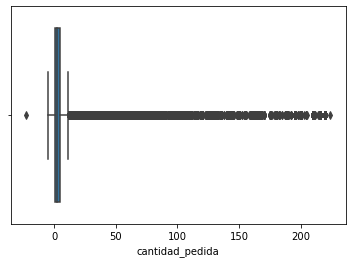

In [101]:
print('Antes')
print(ventas.cantidad_pedida.describe())
print('\nDespues')
print(df_zscore.cantidad_pedida.describe())
print('\nSe eliminaron', len(ventas) - len(df_zscore), 'filas')
fig = sns.boxplot(x=df_zscore.cantidad_pedida)

In [102]:
#Total de registros a eliminar (sin considerar los valores por debajo del 0)
len(df_zscore[df_zscore.cantidad_pedida<=0]) # sacaria en total 1394 + 909 = 2303 filas

1394

In [103]:
#Detección por Modified Z Score
df_zscorem = outliers_modified_z_score(ventas, 'cantidad_pedida')
df_zscorem

,dia,mes,anio,hora,sku,cantidad_pedida,id_punto_venta,fecha
0,4,1,2018,15:05:34.0000000,3071,1.00,100000,2018-01-04
1,4,1,2018,15:05:34.0000000,1872,4.00,100000,2018-01-04
2,4,1,2018,15:05:34.0000000,2008,4.00,100000,2018-01-04
3,4,1,2018,15:05:34.0000000,2009,4.00,100000,2018-01-04
4,4,1,2018,15:05:34.0000000,1918,4.00,100000,2018-01-04
...,...,...,...,...,...,...,...,...
5666360,31,12,2019,15:27:50.2900000,3121,2.00,100653-1,2019-12-31
5666361,31,12,2019,15:27:50.2900000,3051,6.00,100653-1,2019-12-31
5666362,31,12,2019,17:56:45.8570000,1244,1.00,100538,2019-12-31
5666363,31,12,2019,17:56:45.8570000,1966,3.00,100538,2019-12-31


count   4924826.00
mean          2.44
std           1.57
min          -1.00
25%           1.00
50%           2.00
75%           3.00
max           7.00
Name: cantidad_pedida, dtype: float64
Se eliminaron 741539 filas


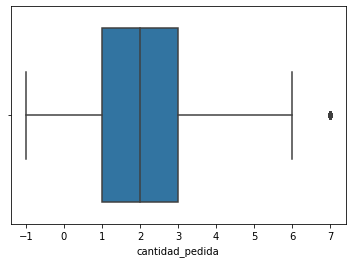

In [104]:
print(df_zscorem.cantidad_pedida.describe())
print('Se eliminaron', len(ventas) - len(df_zscorem), 'filas')
fig = sns.boxplot(x=df_zscorem.cantidad_pedida)

Para este caso se considera que se elimina demasiados registros por lo que no se seleccionara.

In [105]:
#Detección por IQR
df_iqr = outliers_iqr(ventas, 'cantidad_pedida')
df_iqr

,dia,mes,anio,hora,sku,cantidad_pedida,id_punto_venta,fecha
0,4,1,2018,15:05:34.0000000,3071,1.00,100000,2018-01-04
1,4,1,2018,15:05:34.0000000,1872,4.00,100000,2018-01-04
2,4,1,2018,15:05:34.0000000,2008,4.00,100000,2018-01-04
3,4,1,2018,15:05:34.0000000,2009,4.00,100000,2018-01-04
4,4,1,2018,15:05:34.0000000,1918,4.00,100000,2018-01-04
...,...,...,...,...,...,...,...,...
5666360,31,12,2019,15:27:50.2900000,3121,2.00,100653-1,2019-12-31
5666361,31,12,2019,15:27:50.2900000,3051,6.00,100653-1,2019-12-31
5666362,31,12,2019,17:56:45.8570000,1244,1.00,100538,2019-12-31
5666363,31,12,2019,17:56:45.8570000,1966,3.00,100538,2019-12-31


count   5298760.00
mean          2.92
std           2.33
min          -5.00
25%           1.00
50%           2.00
75%           4.00
max          11.00
Name: cantidad_pedida, dtype: float64
Se eliminaron 367605 filas


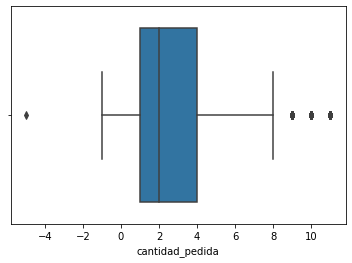

In [106]:
print(df_iqr.cantidad_pedida.describe())
print('Se eliminaron', len(ventas) - len(df_iqr), 'filas')
fig = sns.boxplot(x=df_iqr.cantidad_pedida)

Para este caso se considera que se elimina demasiados registros por lo que no se seleccionara.

In [107]:
#Deteccion por percentiles de 0.99 y 0.01
df_quantile_01 = outliers_quantile(ventas, 'cantidad_pedida')
df_quantile_01

,dia,mes,anio,hora,sku,cantidad_pedida,id_punto_venta,fecha
0,4,1,2018,15:05:34.0000000,3071,1.00,100000,2018-01-04
1,4,1,2018,15:05:34.0000000,1872,4.00,100000,2018-01-04
2,4,1,2018,15:05:34.0000000,2008,4.00,100000,2018-01-04
3,4,1,2018,15:05:34.0000000,2009,4.00,100000,2018-01-04
4,4,1,2018,15:05:34.0000000,1918,4.00,100000,2018-01-04
...,...,...,...,...,...,...,...,...
5666360,31,12,2019,15:27:50.2900000,3121,2.00,100653-1,2019-12-31
5666361,31,12,2019,15:27:50.2900000,3051,6.00,100653-1,2019-12-31
5666362,31,12,2019,17:56:45.8570000,1244,1.00,100538,2019-12-31
5666363,31,12,2019,17:56:45.8570000,1966,3.00,100538,2019-12-31


count   5609978.00
mean          3.79
std           4.45
min           1.00
25%           1.00
50%           2.00
75%           4.00
max          35.00
Name: cantidad_pedida, dtype: float64
Se eliminaron 56387 filas


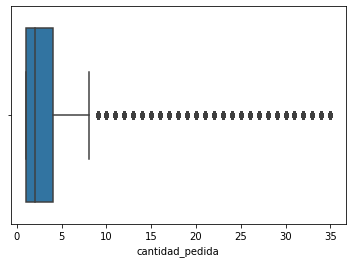

In [108]:
print(df_quantile_01.cantidad_pedida.describe())
print('Se eliminaron', len(ventas) - len(df_quantile_01), 'filas')
fig = sns.boxplot(x=df_quantile_01.cantidad_pedida)

Para este caso se considera que se elimina demasiados registros por lo que no se seleccionara.

In [109]:
#Deteccion por percentiles de 0.995 y 0.005
df_quantile_005 = outliers_quantile(ventas, 'cantidad_pedida', percentil=0.005)
df_quantile_005

,dia,mes,anio,hora,sku,cantidad_pedida,id_punto_venta,fecha
0,4,1,2018,15:05:34.0000000,3071,1.00,100000,2018-01-04
1,4,1,2018,15:05:34.0000000,1872,4.00,100000,2018-01-04
2,4,1,2018,15:05:34.0000000,2008,4.00,100000,2018-01-04
3,4,1,2018,15:05:34.0000000,2009,4.00,100000,2018-01-04
4,4,1,2018,15:05:34.0000000,1918,4.00,100000,2018-01-04
...,...,...,...,...,...,...,...,...
5666360,31,12,2019,15:27:50.2900000,3121,2.00,100653-1,2019-12-31
5666361,31,12,2019,15:27:50.2900000,3051,6.00,100653-1,2019-12-31
5666362,31,12,2019,17:56:45.8570000,1244,1.00,100538,2019-12-31
5666363,31,12,2019,17:56:45.8570000,1966,3.00,100538,2019-12-31


count   5638505.00
mean          3.99
std           5.26
min           1.00
25%           1.00
50%           2.00
75%           4.00
max          50.00
Name: cantidad_pedida, dtype: float64
Se eliminaron 27860 filas


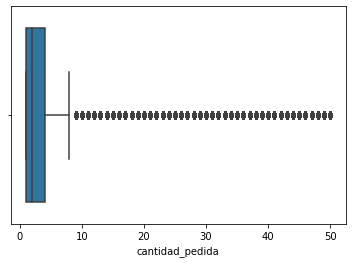

In [110]:
print(df_quantile_005.cantidad_pedida.describe())
print('Se eliminaron', len(ventas) - len(df_quantile_005), 'filas')
fig = sns.boxplot(x=df_quantile_005.cantidad_pedida)

In [111]:
#Se crea una nueva variable con el método de filtrado de outliers seleccionado
ventas_filtrado = df_quantile_005

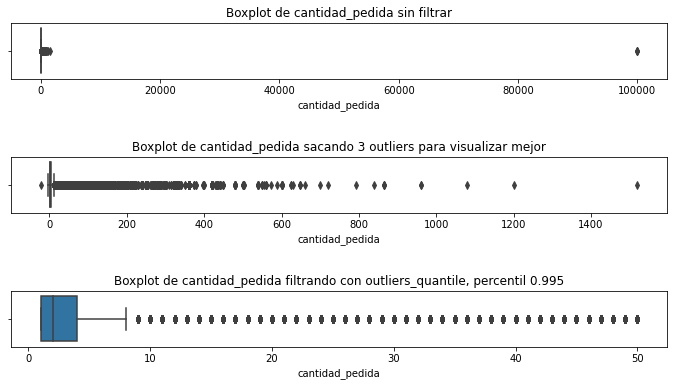

In [112]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize = (10,6))
sns.boxplot(x=ventas.cantidad_pedida, ax=ax1)
ax1.set_title('Boxplot de cantidad_pedida sin filtrar')
sns.boxplot(x=zoom.cantidad_pedida, ax=ax2)
ax2.set_title('Boxplot de cantidad_pedida sacando 3 outliers para visualizar mejor')
sns.boxplot(x=df_quantile_005.cantidad_pedida, ax=ax3)
ax3.set_title('Boxplot de cantidad_pedida filtrando con ' + outliers_quantile.__name__ + ', percentil 0.995')
fig.tight_layout(pad=3.0)

#### 2.8. Guardar el Set de Datos con un Nombre Informativo

Combinar las fuentes de datos curadas en un unico archivo. Para ello, antes deberá hacer merge de todos los dataframe para lograr un único dataset final resultante. Se recomienda guardar el dataset resultante en formato comprimido. 

In [113]:
#Merge 1: Unimos productos y categorias
productos_categoria = pd.merge(productos,categorias,on='id_categoria').rename(columns={'nombre':'categoria'})

In [114]:
#Merge 2: Unimos ventas con producto_categoria con left join
ventas_producto = pd.merge(ventas_filtrado,productos_categoria,left_on='sku',right_on='sku',how='left')
# es left join asi que no voy a perder ninguna venta

In [115]:
#Merge 3: Unimos pdv_ubicacion con localidades 
pdv_ubicacion = pdv.merge(localidades,on='id_Localidad').rename(columns={'nombre_x':'Punto_Venta','nombre_y':'Localidad'})

In [116]:
#Merge 4: Unimos pdv_ubicacion con provincias
pdv_ubicacion = pdv_ubicacion.merge(provincias,on='id_Provincia').rename(columns={'nombre':'Provincia'})

In [117]:
#Merge 5: Unimos pdv_ubicacion con paises
pdv_ubicacion = pdv_ubicacion.merge(paises,on='id_Pais').rename(columns={'nombre':'Pais'})

In [118]:
#Merge 6: Unimos ventas_producto con pdv_ubicacion con left join
ventas_producto_pdv = pd.merge(ventas_producto,pdv_ubicacion,left_on='id_punto_venta',right_on='id_punto_venta',how='left')

In [119]:
# Verificamos que features tienen valores nulos
ventas_producto_pdv.isnull().sum().to_frame().sort_values(0, ascending = False).reset_index()

,index,0
0,Pais,664763
1,Provincia,664763
2,Localidad,664763
3,id_Pais,664763
4,id_Localidad,664763
5,id_Provincia,664763
6,Punto_Venta,664763
7,unidadcm3,2
8,categoria,2
9,id_proveedor,2


In [120]:
# Verificamos las dimensiones del dataframe
ventas_producto_pdv.shape

(5638505, 23)

In [121]:
# Verificamos los tipos de datos del dataframe resultante
ventas_producto_pdv.dtypes.to_frame()

,0
dia,int64
mes,int64
anio,int64
hora,object
sku,int64
cantidad_pedida,float64
id_punto_venta,object
fecha,datetime64[ns]
descripcion,object
marca,object


#### 2.7. Evaluar Cómo Comprimir los Datos Para su Almacenamiento Más Eficiente

In [122]:
#Utilizamos la libreria pickle
import pickle as pkl 
#ventas_producto_pdv.to_pickle('/content/gdrive/MyDrive/Colab Notebooks/Mentoria/Entregable 2/dataset/ventas_producto_pdv')
ventas_producto_pdv.to_pickle('dataset/ventas_producto_pdv')

In [123]:
#Para probar que se guardo bien y se puede leer
#prueba_pkl = pd.read_pickle('/content/gdrive/MyDrive/Colab Notebooks/Mentoria/Entregable 2/dataset/ventas_producto_pdv')
prueba_pkl = pd.read_pickle('dataset/ventas_producto_pdv')
prueba_pkl.shape

(5638505, 23)

### 3. Pasos Opcionales para limpieza de Datos - Deseables

#### 3.1. Ordenar Variables/Columnas

In [124]:
ventas_producto_pdv.columns

Index(['dia', 'mes', 'anio', 'hora', 'sku', 'cantidad_pedida',
       'id_punto_venta', 'fecha', 'descripcion', 'marca', 'id_categoria',
       'presentacion', 'unidadcm3', 'unidadkg', 'id_proveedor', 'categoria',
       'Punto_Venta', 'id_Provincia', 'id_Localidad', 'id_Pais', 'Localidad',
       'Provincia', 'Pais'],
      dtype='object')

In [125]:
orden = ['dia', 'mes', 'anio', 'hora', 'fecha', 
         'sku', 'descripcion', 'marca', 'presentacion', 'categoria', 'id_categoria', 
         'cantidad_pedida' , 'unidadcm3', 'unidadkg',  
         'Punto_Venta', 'id_punto_venta', 'id_proveedor', 
         'Localidad', 'id_Localidad', 'Provincia', 'id_Provincia', 'Pais', 'id_Pais']

In [126]:
ventas_producto_pdv = ventas_producto_pdv[orden]
ventas_producto_pdv.sample(5)

,dia,mes,anio,hora,fecha,sku,descripcion,marca,presentacion,categoria,id_categoria,cantidad_pedida,unidadcm3,unidadkg,Punto_Venta,id_punto_venta,id_proveedor,Localidad,id_Localidad,Provincia,id_Provincia,Pais,id_Pais
1711489,12,9,2018,17:02:53.0000000,2018-09-12,910,PACKXX-XX-X-XXXRIDO,GRIDO,Kilogramos,17 - POTE 1 LTS,63.00,1.00,0.56,4.14,ONCXXX-XX-XXNCE,100311,2.00,Balvanera,5526.00,Capital Federal,81.00,Argentina,1.00
1208669,16,10,2019,16:55:41.0600000,2019-10-16,1690,CHOCXX-XX-X-XXXRIDO,GRIDO,Baldes,07 - SABORES COMUNES,44.00,3.00,0.80,7.80,NaN,100215,2.00,NaN,NaN,NaN,NaN,NaN,NaN
5447747,1,10,2019,01:04:21.0000000,2019-10-01,3060,MINIXX-XX-X-XXXX1UN,VIA BANA,Unidades,0013 - PRODUCTOS VIA BANA - TIPO A,92.00,13.00,0.04,2.82,PTEXXX-XX-XXNOS,100862,3.00,San Miguel De Tucumán,3.00,Tucumán,23.00,Argentina,1.00
2515526,8,12,2019,17:54:17.4230000,2019-12-08,1689,FRUTXX-XX-X-XXXRIDO,GRIDO,Baldes,07 - SABORES COMUNES,44.00,1.00,0.80,7.80,GUIXXX-XX-XX II,100414-1,2.00,Córdoba,2.00,Córdoba,5.00,Argentina,1.00
2904858,14,5,2018,16:43:24.0000000,2018-05-14,1691,VAINXX-XX-X-XXXRIDO,GRIDO,Baldes,07 - SABORES COMUNES,44.00,1.00,0.80,7.80,COSXXX-XX-XX II,100777-1,2.00,Cosquín,1580.00,Córdoba,5.00,Argentina,1.00


#### 3.2. Quitar Variables/Columnas Irrelevantes

Analizando la matriz de correlación de la variables independientes, existen variables irrelevantes o que podriamos quitar?

In [127]:
#Se genera una nueva variable de ubicación
ventas_producto_pdv['ubicacion'] = ventas_producto_pdv['Localidad']+', '+ventas_producto_pdv['Provincia']

#Filtramos las variables necesarias (consideramos Provincia para el desarrollo de incisos posteriores pero despues se podría borrar)
df = ventas_producto_pdv[['mes', 'anio', 'sku', 'marca', 'presentacion', 'categoria',
       'cantidad_pedida', 'unidadkg', 'id_proveedor', 'ubicacion', 'Provincia']]
df

,mes,anio,sku,marca,presentacion,categoria,cantidad_pedida,unidadkg,id_proveedor,ubicacion,Provincia
0,1,2018,3071,GRIDO,Unidades,000 - GRIDO MIX,1.00,680.32,2.00,NaN,NaN
1,1,2018,1872,FRIZZIO,Pack,01 - FRIZZIO,4.00,6.12,2.00,NaN,NaN
2,1,2018,2008,FRIZZIO,Pack,01 - FRIZZIO,4.00,6.08,2.00,NaN,NaN
3,1,2018,2009,FRIZZIO,Pack,01 - FRIZZIO,4.00,6.08,2.00,NaN,NaN
4,1,2018,1918,FRIZZIO,Unidades,01 - FRIZZIO,4.00,3.60,2.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5638500,12,2019,3121,GRIDO,Unidades,0001 - INDUMENTARIA,2.00,0.00,3.00,"Córdoba, Córdoba",Córdoba
5638501,12,2019,3051,SIN DEFINIR,Unidades,0006 - EQUIPOS,6.00,0.47,3.00,"Córdoba, Córdoba",Córdoba
5638502,12,2019,1244,SIN DEFINIR,Unidades,"0005 - CARTELERIA, INSTITUCIONALES Y PLOTEOS",1.00,0.44,3.00,"San Juan, San Juan",San Juan
5638503,12,2019,1966,SIN DEFINIR,No Asignada,0007 - ACCESORIOS Y REPUESTOS PARA EQUIPOS DE FRIO,3.00,0.00,3.00,"San Juan, San Juan",San Juan


#### 3.3. Renombrar Variables de Grillas

Esto se puede hacer de manera transparente a través de un diccionario.

#### 3.4. Categorizar Variables que Contengan “Otros”

Se sugiere reemplazar los valores de las columnas categóricas que contienen valores vacíos por el string "Otros" para el caso de marcas, presentaciones y categorias. 

#### 3.5. Agregar Metadata a los Datos

Agregar información acerca de cuando y como fueron obtenidos, limpieza realizada, decisiones implementadas, etc.

### 4- Análisis complementario de algunas features

En este punto deberán realizar un análisis mas profundo de algunas features y documentar las decisiones tomadas. 

Algunas preguntas que deberán responder en este apartado son:

#### 4.1 Al generarse los joins entre todas las fuentes de datos qué información quedó excluída?

##### Merge Productos y Categorias (id_categoria)

In [128]:
#Analisis del join entre productos y categorias
set(productos.id_categoria) - set(categorias.id_categoria)

set()

In [129]:
set(categorias.id_categoria)-set(productos.id_categoria)

{37, 67, 75, 76, 80, 83, 84, 86, 110, 116, 189, 548}

In [130]:
#Verificamos cantidad de registros de productos vs registros de la nueva variable resultante del merge
print('Registros productos: ',len(productos))
print('Registros productos_categoria: ',len(productos_categoria))

Registros productos:  4352
Registros productos_categoria:  4352


In [131]:
#Analizamos las categorías
print('N categorias(pre-merge):',len(categorias))
print('N categorias (post-merge',productos_categoria.categoria.nunique())
print ('Diferencia: ',len(categorias)-productos_categoria.categoria.nunique())

N categorias(pre-merge): 88
N categorias (post-merge 75
Diferencia:  13


In [132]:
#Insepeccionamos que categorías desaparecieron
list_categoria = productos_categoria.categoria.drop_duplicates().tolist()
categorias[~categorias['nombre'].isin(list_categoria)]

,id_categoria,nombre
2,37,06 - Pack Postres/Tortas Grido
32,67,VACIO
40,75,vacia
41,76,VACIO
45,80,VACIO
47,83,VACIO
48,84,VACIO
50,86,20 - SISTEMAS DE FRÍO A PEDIDO
59,110,12 - REPUESTOS EQUIPOS DE FRIO
62,116,00 - VIA BANA MIX


De la unión de productos y categorias, se pueden realizar las siguientes observaciones:

1.   Se mantuvo la totalidad de registros de la base de productos (sin pérdidas).
2.   Hay 13 categorías que ya no se encuentran luego de realizar la unión. Esto se debe a que no existen productos que posean estas categorías por lo que estaría correcto la eliminación para el objetivo de este trabajo. Por otro lado, "limpiamos" las categorías denominadas como "VACIO" y "vacia".



##### Merge ventas y productos_categoria (sku)

In [133]:
print('Registros productos_categoria: ',len(productos_categoria))
print('Registros ventas_filtrado: ',len(ventas_filtrado))
print('Registros ventas_producto: ',len(ventas_producto))

Registros productos_categoria:  4352
Registros ventas_filtrado:  5638505
Registros ventas_producto:  5638505


In [134]:
print('SKU productos_categoria: ',productos_categoria.sku.nunique())
print('SKU ventas_filtrado: ',ventas_filtrado.sku.nunique())
print('SKU ventas_producto: ',ventas_producto.sku.nunique())

SKU productos_categoria:  4352
SKU ventas_filtrado:  588
SKU ventas_producto:  588


In [135]:
#Analizamos cuales sku ya NO están en el dataset nuevo
ventas_producto[ventas_producto['descripcion'].isna()]

,dia,mes,anio,hora,sku,cantidad_pedida,id_punto_venta,fecha,descripcion,marca,id_categoria,presentacion,unidadcm3,unidadkg,id_proveedor,categoria
5472333,16,10,2019,07:59:10.4300000,9282,6.00,727,2019-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5472335,16,10,2019,08:03:43.7830000,9282,6.00,727-1,2019-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
#Estos son los productos que no figuraran en el dataset generado dado que no tienen ventas registradas
list_sku = ventas_filtrado.sku.drop_duplicates().tolist()
sku_drop = productos_categoria[~productos_categoria['sku'].isin(list_sku)]

#Vemos a que categorías corresponden y marca
print(len(sku_drop.categoria.drop_duplicates().tolist()))
print(len(sku_drop[sku_drop['id_proveedor']==3].categoria.drop_duplicates().tolist()))

70
38


De la unión de ventas_filtrado y producto_categoria, se pueden realizar las siguientes observaciones:

1.   Se mantuvo la totalidad de registros de la base de ventas_filtrado (sin pérdidas).
2.   Sólo quedan 588 sku de un total de 4352 que teniamos inicialmente. Se podría decir que los productos que no figuran no registran ventas de los mismos por lo que no habría inconvenientes.
3.   Se observa que el sku 9282 no posee información proveniente del dataset de producto_categoria. Dado que sólo son dos registros se podría eliminar los mismos.  


##### Merge entre pdv y localidades (id_Localidad)

In [137]:
print('Registros pdv: ',len(pdv))
print('Registros localidades: ',len(localidades))
print('Registros pdv_ubicacion: ',len(pdv_ubicacion))

Registros pdv:  1850
Registros localidades:  897
Registros pdv_ubicacion:  1850


In [138]:
print('id_Localidad de pdv: ',pdv.id_Localidad.nunique())
print('id_Localidad de localidades: ',localidades.id_Localidad.nunique())
print('id_Localidad de pdv_ubicacion: ',pdv_ubicacion.id_Localidad.nunique())
print('Diferencia: ',localidades.id_Localidad.nunique()-pdv.id_Localidad.nunique())

id_Localidad de pdv:  733
id_Localidad de localidades:  897
id_Localidad de pdv_ubicacion:  733
Diferencia:  164


In [139]:
#Analizamos las localidades que ya no estan
list_loc = pdv_ubicacion.id_Localidad.drop_duplicates().tolist()
localidades[~localidades['id_Localidad'].isin(list_loc)]

,id_Localidad,nombre
121,2149,Villa Giardino
158,272,"Lincoln, Coronel Martinez De Hoz"
185,3091,Olta
198,458,"Hipólito Yrigoyen, Henderson"
332,1684,Huerta Grande
...,...,...
883,4705,Zenon Pereyra
887,3780,El Carril
891,3830,La Caldera
894,5850,Potrerillos


De la unión de pdv y localidades, se pueden realizar las siguientes observaciones:

1.   Se mantuvo la totalidad de registros de la base de pdv (sin pérdidas).
2.   Hay 164 localidades que no figuran en el nuevo dataset.

##### Merge entre pdv_ubicacion y provincias

In [140]:
print('Registros pdv_ubicacion: ',len(pdv_ubicacion))
print('Registros provincias: ',len(provincias))

Registros pdv_ubicacion:  1850
Registros provincias:  78


In [141]:
print('id_Provincia de localidades: ',provincias.id_Provincia.nunique())
print('id_Provincia de pdv_ubicacion: ',pdv_ubicacion.id_Provincia.nunique())
print('Diferencia: ',provincias.id_Provincia.nunique()-pdv_ubicacion.id_Provincia.nunique())

id_Provincia de localidades:  78
id_Provincia de pdv_ubicacion:  25
Diferencia:  53


In [142]:
#Analizamos las localidades que ya no estan
list_prov = pdv_ubicacion.id_Provincia.drop_duplicates().tolist()
provincias[~provincias['id_Provincia'].isin(list_prov)][:5]

,id_Provincia,nombre
22,121,Santiago
23,122,Cordillera
24,92,Valparaíso
25,48,Los Andes
26,49,Quillota


De la unión de pdv_ubicacion y provincias, se pueden realizar las siguientes observaciones:

1.   Se mantuvo la totalidad de registros de la base de pdv_ubicacion (sin pérdidas).
2.   Hay 53 provincias que no figuran en el nuevo dataset. Hay varias de estas provincias que corresponden a otros países, dado que el dataset posee solo registros de puntos de ventas de Argentina no habría problema de que quedaran descartadas.

##### Merge entre pdv_ubicacion y paises

In [143]:
print('Registros pdv_ubicacion: ',len(pdv_ubicacion))
print('Registros paises: ',len(paises))

Registros pdv_ubicacion:  1850
Registros paises:  5


In [144]:
print('id_Pais de paises: ',paises.id_Pais.nunique())
print('id_Pais de pdv_ubicacion: ',pdv_ubicacion.id_Pais.nunique())
print('Diferencia: ',paises.id_Pais.nunique()-pdv_ubicacion.id_Pais.nunique())

id_Pais de paises:  5
id_Pais de pdv_ubicacion:  2
Diferencia:  3


In [145]:
#Analizamos las paises que ya no estan
list_pais = pdv_ubicacion.id_Pais.drop_duplicates().tolist()
paises[~paises['id_Pais'].isin(list_pais)]

,id_Pais,nombre
1,2,Chile
3,5,Paraguay
4,7,Bolivia


De la unión de pdv_ubicacion y paises, se pueden realizar las siguientes observaciones:

1.   Se mantuvo la totalidad de registros de la base de pdv_ubicacion (sin pérdidas).
2.   Hay 53 provincias que no figuran en el nuevo dataset. Hay varias de estas provincias que corresponden a otros países, dado que el dataset posee solo registros de puntos de ventas de Argentina no habría problema de que quedaran descartadas.

##### Merge ventas_producto y pdv_ubicacion

In [146]:
print('Registros ventas_producto: ',len(ventas_producto))
print('Registros pdv_ubicacion: ',len(pdv_ubicacion))
print('Registros ventas_producto_pdv: ',len(ventas_producto_pdv))

Registros ventas_producto:  5638505
Registros pdv_ubicacion:  1850
Registros ventas_producto_pdv:  5638505


#### 4.2 Luego de aplicar el checklist de limpieza tiene features resultantes de tipo object? que decisión tomarán al respecto?

In [147]:
#Se convirtieorn las variables de sku, año y mes a string, para que al hacer el encoding se tomen como categoricas y no como numericas
df.loc[:, 'sku'] = df.loc[:, 'sku'].astype(str)
df.loc[:, 'mes'] = df.loc[:, 'mes'].astype(str) 
df.loc[:, 'anio'] = df.loc[:, 'anio'].astype(str)

C:\Users\Sofia\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


#### 4.3 Que decisión se tomó con respecto a los puntos de venta que no tienen información de localización tales como paises, provincias y localidades?

In [148]:
#Se eliminaron (informe se desarrolla más este punto)
df = df.dropna(subset=['ubicacion'])

#### 4.4 Que decisión se tomó con aquellas filas cuya cantidad_pedida era menor o igual a 0?

Se sacaron dado que con el filtrado realizado para outliers se eliminaron. 

#### 4.5 El dataset tiene la feature presentacion en NaN o string vacío?. En caso afirmativo, que decisión condieran pertinente tomar al respecto?

In [149]:
df.presentacion.unique()

array(['Baldes', 'Kilogramos', 'Unidades', 'Pack', ' ', 'No Asignada'],
      dtype=object)

In [150]:
len(df[df.presentacion==' ']) # Dado que no son una gran cantidad de caso se juntan con los 'No Asignada'.

1583

In [151]:
len(df[df.presentacion=='No Asignada']) #El número de casos es alto como para eliminarlos, por el momento se dejan.

250851

In [152]:
df.loc[df.presentacion==' ', 'presentacion'] = 'No Asignada'

C:\Users\Sofia\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


#### 4.6 El dataset tiene la feature marca en NaN o con string vacíos?. En caso afirmativo, que decisión condieran pertinente tomar al respecto?

In [153]:
df.marca.unique()

array(['GRIDO', 'SIN DEFINIR', 'FRIZZIO', 'VIA BANA'], dtype=object)

In [154]:
#Categoría "SIN DEFINIR". Dado que son muchos casos se mantiene.
len(df[df.marca=='SIN DEFINIR']) 

741251

#### 4.7 Tomaron alguna decisión adicional que redujo la cantidad de filas en el dataset resultante?

In [155]:
df.loc[:, 'id_proveedor'] = df.loc[:, 'id_proveedor'].astype(int)
df.loc[:, 'id_proveedor'] = df.loc[:, 'id_proveedor'].astype(str)
df.isna().sum().to_frame()

C:\Users\Sofia\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,0
mes,0
anio,0
sku,0
marca,0
presentacion,0
categoria,0
cantidad_pedida,0
unidadkg,0
id_proveedor,0
ubicacion,0


In [156]:
#Listado de Categorias NO comestibles
listado_0 = ['0010 - PRODUCTOS PROMOCIONALES','0001 - GRIDO MARKET','0006 - PRODUCTOS COMPOSTABLES /BIODEGRADABLES' ,
             '07 - ACCESORIOS, UTENSILIOS Y REPUESTOS ','0005 - ENVASES TERMICOS Y VASOS', '06 - PRODUCTOS DE LIMPIEZA ',
             '0006 - EQUIPOS', '0007 - ACCESORIOS Y REPUESTOS PARA EQUIPOS DE FRIO', '0008 - MUEBLES', '09 - DISPENSER', 
             '0005 - CARTELERIA, INSTITUCIONALES Y PLOTEOS', '0010 - PACKAGING', '0001 - INDUMENTARIA ', 
             '0009 - DESCARTABLES ', '0012 - MATERIAL MKT', '19 - MATERIAS PRIMAS']
#Sacamos categorias no comestibles (según listado definido)
df = df[~df['categoria'].isin(listado_0)]
df #total base de datos 4,319,258

,mes,anio,sku,marca,presentacion,categoria,cantidad_pedida,unidadkg,id_proveedor,ubicacion,Provincia
2886,1,2018,266,GRIDO,Baldes,06 - SABORES AL AGUA,1.00,7.80,2,"Montecristo, Córdoba",Córdoba
2887,1,2018,263,GRIDO,Baldes,06 - SABORES AL AGUA,6.00,7.80,2,"Montecristo, Córdoba",Córdoba
2888,1,2018,861,GRIDO,Kilogramos,06 - SABORES AL AGUA,1.00,7.80,2,"Montecristo, Córdoba",Córdoba
2889,1,2018,1103,GRIDO,Unidades,06 - SABORES AL AGUA,3.00,7.80,2,"Montecristo, Córdoba",Córdoba
2890,1,2018,1695,GRIDO,Baldes,07 - SABORES COMUNES,3.00,7.80,2,"Montecristo, Córdoba",Córdoba
...,...,...,...,...,...,...,...,...,...,...,...
5606771,12,2019,613,SIN DEFINIR,Unidades,"0007 - BAÑOS, CAPUCCINO, LECHE Y SALSAS",2.00,12.93,3,"Córdoba, Córdoba",Córdoba
5606772,12,2019,1097,SIN DEFINIR,Unidades,0008 - DECORACION y FRUTOS,1.00,0.00,3,"Córdoba, Córdoba",Córdoba
5606813,12,2019,1112,SIN DEFINIR,Unidades,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",1.00,5.90,3,"Córdoba, Córdoba",Córdoba
5606819,12,2019,613,SIN DEFINIR,Unidades,"0007 - BAÑOS, CAPUCCINO, LECHE Y SALSAS",1.00,12.93,3,"Córdoba, Córdoba",Córdoba


In [157]:
# Se filtran aquellos registros con unidadkg negativas
df['unidadkg'] = df['unidadkg'].astype(float)
df = df[df.unidadkg > 0]
df #total base de datos 4,283,779

,mes,anio,sku,marca,presentacion,categoria,cantidad_pedida,unidadkg,id_proveedor,ubicacion,Provincia
2886,1,2018,266,GRIDO,Baldes,06 - SABORES AL AGUA,1.00,7.80,2,"Montecristo, Córdoba",Córdoba
2887,1,2018,263,GRIDO,Baldes,06 - SABORES AL AGUA,6.00,7.80,2,"Montecristo, Córdoba",Córdoba
2888,1,2018,861,GRIDO,Kilogramos,06 - SABORES AL AGUA,1.00,7.80,2,"Montecristo, Córdoba",Córdoba
2889,1,2018,1103,GRIDO,Unidades,06 - SABORES AL AGUA,3.00,7.80,2,"Montecristo, Córdoba",Córdoba
2890,1,2018,1695,GRIDO,Baldes,07 - SABORES COMUNES,3.00,7.80,2,"Montecristo, Córdoba",Córdoba
...,...,...,...,...,...,...,...,...,...,...,...
5606767,12,2019,1542,SIN DEFINIR,No Asignada,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",1.00,2.29,3,"Córdoba, Córdoba",Córdoba
5606771,12,2019,613,SIN DEFINIR,Unidades,"0007 - BAÑOS, CAPUCCINO, LECHE Y SALSAS",2.00,12.93,3,"Córdoba, Córdoba",Córdoba
5606813,12,2019,1112,SIN DEFINIR,Unidades,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",1.00,5.90,3,"Córdoba, Córdoba",Córdoba
5606819,12,2019,613,SIN DEFINIR,Unidades,"0007 - BAÑOS, CAPUCCINO, LECHE Y SALSAS",1.00,12.93,3,"Córdoba, Córdoba",Córdoba


In [158]:
# Agrupamos por mes (el dataset estaba a nivel día), ya que es el horizonte temporal que nos interesa predecir 
#y nos ayuda a reducir bastante el tamaño de la matriz sin perder casi información
_columns = ['mes', 'anio', 'sku', 'marca', 'presentacion', 'categoria', 'unidadkg', 'id_proveedor', 'ubicacion',
 'Provincia']
_value_columns =['cantidad_pedida']
df['mes'] = df['mes'].astype(int)
df_grouped=  df.groupby(_columns).sum().reset_index()
df['mes'] = df['mes'].astype(str)
df_grouped['mes'] = df_grouped['mes'].astype(str)
df_grouped

<ipython-input-158-7606cb9bb8cd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mes'] = df['mes'].astype(int)
<ipython-input-158-7606cb9bb8cd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mes'] = df['mes'].astype(str)


,mes,anio,sku,marca,presentacion,categoria,unidadkg,id_proveedor,ubicacion,Provincia,cantidad_pedida
0,1,2018,1008,VIA BANA,No Asignada,0013 - PRODUCTOS VIA BANA - TIPO A,8.50,3,"La Rioja, La Rioja",La Rioja,2.00
1,1,2018,1008,VIA BANA,No Asignada,0013 - PRODUCTOS VIA BANA - TIPO A,8.50,3,"San Isidro, Catamarca",Catamarca,1.00
2,1,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"25 De Mayo, 25 De Mayo, Buenos Aires",Buenos Aires,50.00
3,1,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"3 De Febrero, 3 De Febrero, Buenos Aires",Buenos Aires,18.00
4,1,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"3 De Febrero, Caseros, Buenos Aires",Buenos Aires,128.00
...,...,...,...,...,...,...,...,...,...,...,...
1015981,12,2019,995,SIN DEFINIR,Unidades,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",3.10,3,"Villa Ocampo, Santa Fe",Santa Fe,4.00
1015982,12,2019,995,SIN DEFINIR,Unidades,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",3.10,3,"Villa Pueyrredón, Capital Federal",Capital Federal,2.00
1015983,12,2019,995,SIN DEFINIR,Unidades,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",3.10,3,"Yerba Buena, Tucumán",Tucumán,4.00
1015984,12,2019,995,SIN DEFINIR,Unidades,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",3.10,3,"Zapala, Neuquén",Neuquén,7.00


In [159]:
print('Registros Df inicial',df.shape[0])
print('Registros Df agrupado',df_grouped.shape[0])

Registros Df inicial 4283779
Registros Df agrupado 1015986


#### 4.8 Análisis adicional 

Cualquier análisis adicional o feature que deseen agregar porque lo consideran pertinente, será bienvenido y valorado.

### 5- Enriquecimiento dataset sumando nuevas features

#### 5.1 Tratamiento de las features presentación, categoria y marca

En caso que los datos de estas columnas tengan números, acentos, signos y/o estén en mayúsuclas crear nuevas columnas para cada una de ellas con sufijo _depurada. El contenido de estas nuevas columnas deben estar en minúsculas, quitar acentos, quitar números y quitar signos de puntuación si corresponde. 

In [160]:
# !pip install unidecode

In [161]:
#Columnas de presentacion, categoria y marca a minuscula
df_grouped['presentacion_depurada'] = df_grouped['presentacion'].str.lower()
df_grouped['marca_depurada'] = df_grouped['marca'].str.lower()
df_grouped['categoria_depurada'] = df_grouped['categoria'].str.lower()

In [162]:
#Eliminamos numeros de columnas 
df_grouped['presentacion_depurada'] = df_grouped['presentacion_depurada'].str.replace('\d+', '')
df_grouped['marca_depurada'] = df_grouped['marca_depurada'].str.replace('\d+', '')
df_grouped['categoria_depurada'] = df_grouped['categoria_depurada'].str.replace('\d+', '')

<ipython-input-162-c4a0554da875>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_grouped['presentacion_depurada'] = df_grouped['presentacion_depurada'].str.replace('\d+', '')
<ipython-input-162-c4a0554da875>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_grouped['marca_depurada'] = df_grouped['marca_depurada'].str.replace('\d+', '')
<ipython-input-162-c4a0554da875>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_grouped['categoria_depurada'] = df_grouped['categoria_depurada'].str.replace('\d+', '')


In [163]:
#Eliminamos signos de puntuacion
import string 
df_grouped['categoria_depurada'] = df_grouped['categoria_depurada'].str.replace('[{}]'.format(string.punctuation), '')

#Eliminamos espacios en blancos al principio de las celdas
df_grouped['categoria_depurada'] = df_grouped['categoria_depurada'].str.lstrip()

<ipython-input-163-3d0a95491726>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_grouped['categoria_depurada'] = df_grouped['categoria_depurada'].str.replace('[{}]'.format(string.punctuation), '')


In [164]:
# Definimos una función para sacar los acentos.
from unidecode import unidecode
def remove_accents(df, columns=[]):
    columns = list(columns)
    if len(columns) !=0:
        for i in range(len(columns)):
            if columns[i] in df.columns:
                df[columns[i]]=df[columns[i]].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    else:
        print("Seleccione una columna o la columna no se encuentra en el DataFrame")

In [165]:
#Se eliminan los acentos
remove_accents(df_grouped,['marca_depurada','presentacion_depurada', 'categoria_depurada'])

In [166]:
#Verificamos que se haya eliminado todo
print('Marca: ',df_grouped.marca_depurada.drop_duplicates().tolist())
print('Presentacion: ',df_grouped.presentacion_depurada.drop_duplicates().tolist())
print('Categoria: ',df_grouped.categoria_depurada.drop_duplicates().tolist())

Marca:  ['via bana', 'sin definir', 'grido', 'frizzio']
Presentacion:  ['no asignada', 'unidades', 'kilogramos', 'baldes', 'pack']
Categoria:  ['productos via bana  tipo a', 'impulsivos', 'cucuruchos  conos y vasos de  pasta', 'palitos crema  frutal  bombon', 'sabores al agua', 'sabores premium x  lts  via bana', 'sabores especiales x  lts  via bana', 'productos via bana  tipo b', 'decoracion y frutos', 'sabores al agua x  lts  via bana', 'banos capuccino leche y salsas', 'sabores comunes x  lts  via bana', 'pack potes via bana', 'sabores comunes', 'sabores especiales', 'sabores premium', 'frizzio', 'grido mix', 'pack impulsivos via bana', 'tortas y postres', 'pack postrestortas via bana', 'sundae go', 'pote  lts', 'familiar', 'semifrios', 'grido cafe']


#### 5.3 Valores cantidad_pedida para los periodos t-n (Lag)

Crear columnas nuevas que representen los valores de cantidad_pedida para la combinación de provincia-localidad y sku agrupados por mes para n periodos anteriores (lag t-n). Podrá utilizar pandas.Series.shift para lograr este requerimiento. Seleccione el n que considere pertinente y justifique su elección. 

In [167]:
def lag_t_n(df, cols_group, col_lag, n=1):
    group = df[cols_group + [col_lag]]
    # Tengo que asegurarme que la columna temporal respecto a la que voy a laggear este bien ordenada y para eso tiene que ser tipo int, no str
    group.iloc[:, len(cols_group)-1] = group.iloc[:, len(cols_group)-1].astype(int)
    group = group.groupby(cols_group).sum().reset_index()
    for i in range(1, n+1):
        name = col_lag + '_lag_t-' + str(i)
        group[name] = group.loc[:, col_lag].shift(periods=i)
    # Tiro las filas de los primeros n meses ya que van a ser NaN en la columna cantidad_pedida_lag_t-n
    time_values = list(group.iloc[:, len(cols_group)-1].unique())
    group = group[~(group.iloc[:, len(cols_group)-1].isin(time_values[:n]))]
    group.iloc[:, len(cols_group)-1] = group.iloc[:, len(cols_group)-1].astype(str)
    group.drop(columns=[col_lag], inplace=True)
    return group

In [168]:
lag = lag_t_n(df, ['ubicacion', 'sku', 'anio', 'mes'], 'cantidad_pedida', n=3)
lag[:5]

C:\Users\Sofia\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,ubicacion,sku,anio,mes,cantidad_pedida_lag_t-1,cantidad_pedida_lag_t-2,cantidad_pedida_lag_t-3
3,"25 De Mayo, 25 De Mayo, Buenos Aires",1021,2018,4,65.00,60.00,50.00
4,"25 De Mayo, 25 De Mayo, Buenos Aires",1021,2018,5,15.00,65.00,60.00
5,"25 De Mayo, 25 De Mayo, Buenos Aires",1021,2018,6,25.00,15.00,65.00
6,"25 De Mayo, 25 De Mayo, Buenos Aires",1021,2018,7,30.00,25.00,15.00
7,"25 De Mayo, 25 De Mayo, Buenos Aires",1021,2018,9,20.00,30.00,25.00


In [169]:
df_lagged = df_grouped.merge(lag, how='inner', on=['ubicacion', 'sku', 'anio', 'mes'])
df_lagged

,mes,anio,sku,marca,presentacion,categoria,unidadkg,id_proveedor,ubicacion,Provincia,cantidad_pedida,presentacion_depurada,marca_depurada,categoria_depurada,cantidad_pedida_lag_t-1,cantidad_pedida_lag_t-2,cantidad_pedida_lag_t-3
0,4,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"25 De Mayo, 25 De Mayo, Buenos Aires",Buenos Aires,15.00,unidades,sin definir,impulsivos,65.00,60.00,50.00
1,4,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"3 De Febrero, 3 De Febrero, Buenos Aires",Buenos Aires,8.00,unidades,sin definir,impulsivos,10.00,10.00,18.00
2,4,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"3 De Febrero, Caseros, Buenos Aires",Buenos Aires,73.00,unidades,sin definir,impulsivos,96.00,82.00,128.00
3,4,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"3 De Febrero, Ciudadela, Buenos Aires",Buenos Aires,20.00,unidades,sin definir,impulsivos,55.00,35.00,2.00
4,4,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"3 De Febrero, Santos Lugares, Buenos Aires",Buenos Aires,55.00,unidades,sin definir,impulsivos,55.00,90.00,107.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766595,12,2019,995,SIN DEFINIR,Unidades,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",3.10,3,"Villa Ocampo, Santa Fe",Santa Fe,4.00,unidades,sin definir,cucuruchos conos y vasos de pasta,2.00,3.00,3.00
766596,12,2019,995,SIN DEFINIR,Unidades,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",3.10,3,"Villa Pueyrredón, Capital Federal",Capital Federal,2.00,unidades,sin definir,cucuruchos conos y vasos de pasta,1.00,2.00,4.00
766597,12,2019,995,SIN DEFINIR,Unidades,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",3.10,3,"Yerba Buena, Tucumán",Tucumán,4.00,unidades,sin definir,cucuruchos conos y vasos de pasta,3.00,1.00,2.00
766598,12,2019,995,SIN DEFINIR,Unidades,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",3.10,3,"Zapala, Neuquén",Neuquén,7.00,unidades,sin definir,cucuruchos conos y vasos de pasta,5.00,6.00,10.00


#### 5.4 Crear columnas nuevas para medias móviles simples y/o ponderadas

Crear medias móviles simples y/o ponderadas de la columna cantidad_pedida de n periodos pasados para la combinación de provincia-localidad y sku agrupados por mes. Considere utilizar pandas rolling para el calculo de medias móviles. Seleccione "window" que considere pertinente y justifique su elección.

In [170]:
#Seleccionamos solas las variables que se necesitan
df_roll_mean = df[['anio','mes','ubicacion','sku','cantidad_pedida']]

#Calculamos el promedio mensual para cada sku y ubicacion de cantidad pedida (estaba a nivel diario)
df_roll_mean['mes'] = df_roll_mean['mes'].astype(int)
df_roll_mean = df_roll_mean.groupby(['ubicacion','sku','anio','mes']).mean().reset_index()
df_roll_mean = df_roll_mean.set_index(['ubicacion','sku','anio','mes'])

<ipython-input-170-0543f67d0f4d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_roll_mean['mes'] = df_roll_mean['mes'].astype(int)


In [171]:
#Calculamos la media movil simple para dos y tres ventanas
w2 = df_roll_mean.rolling(2).mean().reset_index()[['cantidad_pedida']]
w3 = df_roll_mean.rolling(3).mean().reset_index()[['cantidad_pedida']]
df_roll_mean = df_roll_mean.reset_index()
df_roll_mean.rename(columns={'cantidad_pedida': 'cantidad_pedida_mean'}, inplace=True)
df_roll_mean['cantidad_pedida_mean_w2'] = w2['cantidad_pedida']
df_roll_mean['cantidad_pedida_mean_w3'] = w3['cantidad_pedida']
df_roll_mean['mes'] = df_roll_mean['mes'].astype(str)
df_roll_mean.fillna(0)

,ubicacion,sku,anio,mes,cantidad_pedida_mean,cantidad_pedida_mean_w2,cantidad_pedida_mean_w3
0,"25 De Mayo, 25 De Mayo, Buenos Aires",1021,2018,1,16.67,0.00,0.00
1,"25 De Mayo, 25 De Mayo, Buenos Aires",1021,2018,2,15.00,15.83,0.00
2,"25 De Mayo, 25 De Mayo, Buenos Aires",1021,2018,3,16.25,15.62,15.97
3,"25 De Mayo, 25 De Mayo, Buenos Aires",1021,2018,4,15.00,15.62,15.42
4,"25 De Mayo, 25 De Mayo, Buenos Aires",1021,2018,5,12.50,13.75,14.58
...,...,...,...,...,...,...,...
1015981,"Zavalla, Santa Fe",908,2018,1,1.00,1.50,1.67
1015982,"Zavalla, Santa Fe",909,2018,1,1.00,1.00,1.33
1015983,"Zavalla, Santa Fe",910,2018,1,1.00,1.00,1.00
1015984,"Zavalla, Santa Fe",911,2018,1,1.00,1.00,1.00


In [172]:
df_lagged_roll_mean = df_lagged.merge(df_roll_mean, how='inner', on=['ubicacion', 'sku', 'anio', 'mes'])
df_lagged_roll_mean

,mes,anio,sku,marca,presentacion,categoria,unidadkg,id_proveedor,ubicacion,Provincia,cantidad_pedida,presentacion_depurada,marca_depurada,categoria_depurada,cantidad_pedida_lag_t-1,cantidad_pedida_lag_t-2,cantidad_pedida_lag_t-3,cantidad_pedida_mean,cantidad_pedida_mean_w2,cantidad_pedida_mean_w3
0,4,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"25 De Mayo, 25 De Mayo, Buenos Aires",Buenos Aires,15.00,unidades,sin definir,impulsivos,65.00,60.00,50.00,15.00,15.62,15.42
1,4,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"3 De Febrero, 3 De Febrero, Buenos Aires",Buenos Aires,8.00,unidades,sin definir,impulsivos,10.00,10.00,18.00,4.00,3.67,4.11
2,4,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"3 De Febrero, Caseros, Buenos Aires",Buenos Aires,73.00,unidades,sin definir,impulsivos,96.00,82.00,128.00,9.12,10.56,10.46
3,4,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"3 De Febrero, Ciudadela, Buenos Aires",Buenos Aires,20.00,unidades,sin definir,impulsivos,55.00,35.00,2.00,20.00,23.75,21.67
4,4,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"3 De Febrero, Santos Lugares, Buenos Aires",Buenos Aires,55.00,unidades,sin definir,impulsivos,55.00,90.00,107.00,18.33,18.33,22.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766595,12,2019,995,SIN DEFINIR,Unidades,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",3.10,3,"Villa Ocampo, Santa Fe",Santa Fe,4.00,unidades,sin definir,cucuruchos conos y vasos de pasta,2.00,3.00,3.00,2.00,2.00,2.33
766596,12,2019,995,SIN DEFINIR,Unidades,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",3.10,3,"Villa Pueyrredón, Capital Federal",Capital Federal,2.00,unidades,sin definir,cucuruchos conos y vasos de pasta,1.00,2.00,4.00,2.00,1.50,1.67
766597,12,2019,995,SIN DEFINIR,Unidades,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",3.10,3,"Yerba Buena, Tucumán",Tucumán,4.00,unidades,sin definir,cucuruchos conos y vasos de pasta,3.00,1.00,2.00,2.00,1.75,1.50
766598,12,2019,995,SIN DEFINIR,Unidades,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",3.10,3,"Zapala, Neuquén",Neuquén,7.00,unidades,sin definir,cucuruchos conos y vasos de pasta,5.00,6.00,10.00,3.50,4.25,4.83


#### 5.5 Features externas a agregar

Que features externas consideran pueden enriquecer el dataset pues tendrían relación con el comportamiento de compra?. Será bienvenido y valorado enriquecer el dataset con alguna variable adicional que considere pertinente y este diponible en forma pública. 

In [173]:
# Info sacada de https://es.wikipedia.org/wiki/Provincias_de_Argentina
# Agregamos informacion de la cantidad y densidad de población de cada provincia
poblacion_densidad = pd.read_csv('poblacion_densidad.csv')
poblacion_densidad['poblacion_prov'] = poblacion_densidad['poblacion_prov'].astype(int)
poblacion_densidad['densidad_prov'] = poblacion_densidad['densidad_prov'].apply(lambda x: x.replace(',', '.')).astype(float)
poblacion_densidad

,provincia,poblacion_prov,densidad_prov
0,Buenos Aires,17541141,57.00
1,Catamarca,415438,4.00
2,Chaco,1204541,12.00
3,Chubut,618994,2.80
4,Córdoba,3760450,23.00
5,Corrientes,1120801,13.00
6,Entre Ríos,1385961,18.00
7,Formosa,605193,8.40
8,Jujuy,770881,14.00
9,La Pampa,358428,2.50


In [174]:
df_lagged_roll_mean_agg = df_lagged_roll_mean.merge(poblacion_densidad, how='left', left_on='Provincia', right_on='provincia').drop(columns=['Provincia', 'provincia'])
df_lagged_roll_mean_agg

,mes,anio,sku,marca,presentacion,categoria,unidadkg,id_proveedor,ubicacion,cantidad_pedida,presentacion_depurada,marca_depurada,categoria_depurada,cantidad_pedida_lag_t-1,cantidad_pedida_lag_t-2,cantidad_pedida_lag_t-3,cantidad_pedida_mean,cantidad_pedida_mean_w2,cantidad_pedida_mean_w3,poblacion_prov,densidad_prov
0,4,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"25 De Mayo, 25 De Mayo, Buenos Aires",15.00,unidades,sin definir,impulsivos,65.00,60.00,50.00,15.00,15.62,15.42,17541141,57.00
1,4,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"3 De Febrero, 3 De Febrero, Buenos Aires",8.00,unidades,sin definir,impulsivos,10.00,10.00,18.00,4.00,3.67,4.11,17541141,57.00
2,4,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"3 De Febrero, Caseros, Buenos Aires",73.00,unidades,sin definir,impulsivos,96.00,82.00,128.00,9.12,10.56,10.46,17541141,57.00
3,4,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"3 De Febrero, Ciudadela, Buenos Aires",20.00,unidades,sin definir,impulsivos,55.00,35.00,2.00,20.00,23.75,21.67,17541141,57.00
4,4,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"3 De Febrero, Santos Lugares, Buenos Aires",55.00,unidades,sin definir,impulsivos,55.00,90.00,107.00,18.33,18.33,22.22,17541141,57.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766595,12,2019,995,SIN DEFINIR,Unidades,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",3.10,3,"Villa Ocampo, Santa Fe",4.00,unidades,sin definir,cucuruchos conos y vasos de pasta,2.00,3.00,3.00,2.00,2.00,2.33,3536418,27.00
766596,12,2019,995,SIN DEFINIR,Unidades,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",3.10,3,"Villa Pueyrredón, Capital Federal",2.00,unidades,sin definir,cucuruchos conos y vasos de pasta,1.00,2.00,4.00,2.00,1.50,1.67,3075646,15069.99
766597,12,2019,995,SIN DEFINIR,Unidades,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",3.10,3,"Yerba Buena, Tucumán",4.00,unidades,sin definir,cucuruchos conos y vasos de pasta,3.00,1.00,2.00,2.00,1.75,1.50,1694656,64.00
766598,12,2019,995,SIN DEFINIR,Unidades,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",3.10,3,"Zapala, Neuquén",7.00,unidades,sin definir,cucuruchos conos y vasos de pasta,5.00,6.00,10.00,3.50,4.25,4.83,664057,7.10


#### 5.6 Crear columna totalkg

En el dataset se puede observar que hay distintos tipos de presentaciones (baldes, pack, etc) y que los productos tienen especificado su peso en kilogramos en la variable unidadkg para cada producto/presentacion. Por tanto, para poder tener una unidad de medida uniforme para todos los productos a producir por la fábrica se sugiere crear una nueva columna en el dataset denominada totalkg que sea el resultado de la multiplicación de cantidad_pedida x unidadkg. Repetir el analisis de outliers esta vez sobre la columna totalkg. Se encontraron nuevos outliers?


In [175]:
df_lagged_roll_mean_agg['totalkg'] = df_lagged_roll_mean_agg['unidadkg'] * df_lagged_roll_mean_agg['cantidad_pedida']

count   766600.00
mean       103.30
std        333.98
min          0.01
25%         15.60
50%         39.00
75%         93.60
max      62941.66
Name: totalkg, dtype: float64


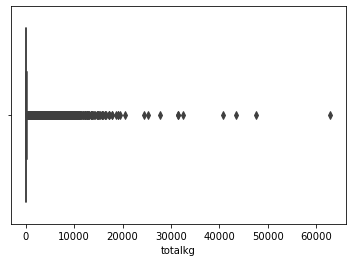

In [176]:
#Estadistica descriptiva de cantidad_pedida
print(df_lagged_roll_mean_agg.totalkg.describe())
fig = sns.boxplot(x=df_lagged_roll_mean_agg.totalkg)

In [177]:
#Detección por Z Score
df_zscore = outliers_z_score(df_lagged_roll_mean_agg, 'totalkg')
df_zscore

,mes,anio,sku,marca,presentacion,categoria,unidadkg,id_proveedor,ubicacion,cantidad_pedida,presentacion_depurada,marca_depurada,categoria_depurada,cantidad_pedida_lag_t-1,cantidad_pedida_lag_t-2,cantidad_pedida_lag_t-3,cantidad_pedida_mean,cantidad_pedida_mean_w2,cantidad_pedida_mean_w3,poblacion_prov,densidad_prov,totalkg
0,4,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"25 De Mayo, 25 De Mayo, Buenos Aires",15.00,unidades,sin definir,impulsivos,65.00,60.00,50.00,15.00,15.62,15.42,17541141,57.00,48.24
1,4,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"3 De Febrero, 3 De Febrero, Buenos Aires",8.00,unidades,sin definir,impulsivos,10.00,10.00,18.00,4.00,3.67,4.11,17541141,57.00,25.73
2,4,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"3 De Febrero, Caseros, Buenos Aires",73.00,unidades,sin definir,impulsivos,96.00,82.00,128.00,9.12,10.56,10.46,17541141,57.00,234.77
3,4,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"3 De Febrero, Ciudadela, Buenos Aires",20.00,unidades,sin definir,impulsivos,55.00,35.00,2.00,20.00,23.75,21.67,17541141,57.00,64.32
4,4,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"3 De Febrero, Santos Lugares, Buenos Aires",55.00,unidades,sin definir,impulsivos,55.00,90.00,107.00,18.33,18.33,22.22,17541141,57.00,176.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766595,12,2019,995,SIN DEFINIR,Unidades,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",3.10,3,"Villa Ocampo, Santa Fe",4.00,unidades,sin definir,cucuruchos conos y vasos de pasta,2.00,3.00,3.00,2.00,2.00,2.33,3536418,27.00,12.40
766596,12,2019,995,SIN DEFINIR,Unidades,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",3.10,3,"Villa Pueyrredón, Capital Federal",2.00,unidades,sin definir,cucuruchos conos y vasos de pasta,1.00,2.00,4.00,2.00,1.50,1.67,3075646,15069.99,6.20
766597,12,2019,995,SIN DEFINIR,Unidades,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",3.10,3,"Yerba Buena, Tucumán",4.00,unidades,sin definir,cucuruchos conos y vasos de pasta,3.00,1.00,2.00,2.00,1.75,1.50,1694656,64.00,12.40
766598,12,2019,995,SIN DEFINIR,Unidades,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",3.10,3,"Zapala, Neuquén",7.00,unidades,sin definir,cucuruchos conos y vasos de pasta,5.00,6.00,10.00,3.50,4.25,4.83,664057,7.10,21.70


Antes
count   766600.00
mean       103.30
std        333.98
min          0.01
25%         15.60
50%         39.00
75%         93.60
max      62941.66
Name: totalkg, dtype: float64

Despues
count   759818.00
mean        83.07
std        129.95
min          0.01
25%         15.60
50%         39.00
75%         92.70
max       1104.40
Name: totalkg, dtype: float64

Se eliminaron 6782 filas


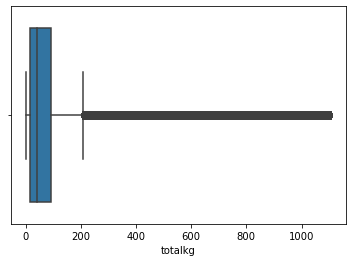

In [178]:
print('Antes')
print(df_lagged_roll_mean_agg.totalkg.describe())
print('\nDespues')
print(df_zscore.totalkg.describe())
print('\nSe eliminaron', len(df_lagged_roll_mean_agg) - len(df_zscore), 'filas')
fig = sns.boxplot(x=df_zscore.totalkg)

In [179]:
#Detección por Modified Z Score
df_zscorem = outliers_modified_z_score(df_lagged_roll_mean_agg, 'totalkg')
df_zscorem

,mes,anio,sku,marca,presentacion,categoria,unidadkg,id_proveedor,ubicacion,cantidad_pedida,presentacion_depurada,marca_depurada,categoria_depurada,cantidad_pedida_lag_t-1,cantidad_pedida_lag_t-2,cantidad_pedida_lag_t-3,cantidad_pedida_mean,cantidad_pedida_mean_w2,cantidad_pedida_mean_w3,poblacion_prov,densidad_prov,totalkg
0,4,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"25 De Mayo, 25 De Mayo, Buenos Aires",15.00,unidades,sin definir,impulsivos,65.00,60.00,50.00,15.00,15.62,15.42,17541141,57.00,48.24
1,4,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"3 De Febrero, 3 De Febrero, Buenos Aires",8.00,unidades,sin definir,impulsivos,10.00,10.00,18.00,4.00,3.67,4.11,17541141,57.00,25.73
3,4,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"3 De Febrero, Ciudadela, Buenos Aires",20.00,unidades,sin definir,impulsivos,55.00,35.00,2.00,20.00,23.75,21.67,17541141,57.00,64.32
4,4,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"3 De Febrero, Santos Lugares, Buenos Aires",55.00,unidades,sin definir,impulsivos,55.00,90.00,107.00,18.33,18.33,22.22,17541141,57.00,176.88
5,4,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"9 De Julio, 9 De Julio, Buenos Aires",59.00,unidades,sin definir,impulsivos,96.00,26.00,1.00,14.75,16.97,19.98,17541141,57.00,189.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766595,12,2019,995,SIN DEFINIR,Unidades,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",3.10,3,"Villa Ocampo, Santa Fe",4.00,unidades,sin definir,cucuruchos conos y vasos de pasta,2.00,3.00,3.00,2.00,2.00,2.33,3536418,27.00,12.40
766596,12,2019,995,SIN DEFINIR,Unidades,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",3.10,3,"Villa Pueyrredón, Capital Federal",2.00,unidades,sin definir,cucuruchos conos y vasos de pasta,1.00,2.00,4.00,2.00,1.50,1.67,3075646,15069.99,6.20
766597,12,2019,995,SIN DEFINIR,Unidades,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",3.10,3,"Yerba Buena, Tucumán",4.00,unidades,sin definir,cucuruchos conos y vasos de pasta,3.00,1.00,2.00,2.00,1.75,1.50,1694656,64.00,12.40
766598,12,2019,995,SIN DEFINIR,Unidades,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",3.10,3,"Zapala, Neuquén",7.00,unidades,sin definir,cucuruchos conos y vasos de pasta,5.00,6.00,10.00,3.50,4.25,4.83,664057,7.10,21.70


count   681316.00
mean        47.46
std         45.37
min          0.01
25%         13.22
50%         31.20
75%         67.60
max        195.84
Name: totalkg, dtype: float64
Se eliminaron 85284 filas


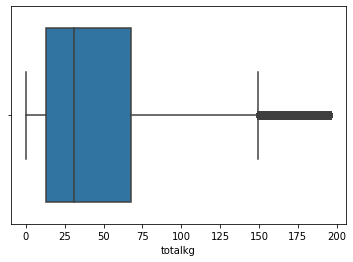

In [180]:
print(df_zscorem.totalkg.describe())
print('Se eliminaron', len(df_lagged_roll_mean_agg) - len(df_zscorem), 'filas')
fig = sns.boxplot(x=df_zscorem.totalkg)

In [181]:
#Detección por IQR
df_iqr = outliers_iqr(df_lagged_roll_mean_agg, 'totalkg')
df_iqr

,mes,anio,sku,marca,presentacion,categoria,unidadkg,id_proveedor,ubicacion,cantidad_pedida,presentacion_depurada,marca_depurada,categoria_depurada,cantidad_pedida_lag_t-1,cantidad_pedida_lag_t-2,cantidad_pedida_lag_t-3,cantidad_pedida_mean,cantidad_pedida_mean_w2,cantidad_pedida_mean_w3,poblacion_prov,densidad_prov,totalkg
0,4,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"25 De Mayo, 25 De Mayo, Buenos Aires",15.00,unidades,sin definir,impulsivos,65.00,60.00,50.00,15.00,15.62,15.42,17541141,57.00,48.24
1,4,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"3 De Febrero, 3 De Febrero, Buenos Aires",8.00,unidades,sin definir,impulsivos,10.00,10.00,18.00,4.00,3.67,4.11,17541141,57.00,25.73
3,4,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"3 De Febrero, Ciudadela, Buenos Aires",20.00,unidades,sin definir,impulsivos,55.00,35.00,2.00,20.00,23.75,21.67,17541141,57.00,64.32
4,4,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"3 De Febrero, Santos Lugares, Buenos Aires",55.00,unidades,sin definir,impulsivos,55.00,90.00,107.00,18.33,18.33,22.22,17541141,57.00,176.88
5,4,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"9 De Julio, 9 De Julio, Buenos Aires",59.00,unidades,sin definir,impulsivos,96.00,26.00,1.00,14.75,16.97,19.98,17541141,57.00,189.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766595,12,2019,995,SIN DEFINIR,Unidades,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",3.10,3,"Villa Ocampo, Santa Fe",4.00,unidades,sin definir,cucuruchos conos y vasos de pasta,2.00,3.00,3.00,2.00,2.00,2.33,3536418,27.00,12.40
766596,12,2019,995,SIN DEFINIR,Unidades,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",3.10,3,"Villa Pueyrredón, Capital Federal",2.00,unidades,sin definir,cucuruchos conos y vasos de pasta,1.00,2.00,4.00,2.00,1.50,1.67,3075646,15069.99,6.20
766597,12,2019,995,SIN DEFINIR,Unidades,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",3.10,3,"Yerba Buena, Tucumán",4.00,unidades,sin definir,cucuruchos conos y vasos de pasta,3.00,1.00,2.00,2.00,1.75,1.50,1694656,64.00,12.40
766598,12,2019,995,SIN DEFINIR,Unidades,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",3.10,3,"Zapala, Neuquén",7.00,unidades,sin definir,cucuruchos conos y vasos de pasta,5.00,6.00,10.00,3.50,4.25,4.83,664057,7.10,21.70


count   687900.00
mean        48.97
std         47.68
min          0.01
25%         13.25
50%         31.20
75%         70.20
max        210.60
Name: totalkg, dtype: float64
Se eliminaron 78700 filas


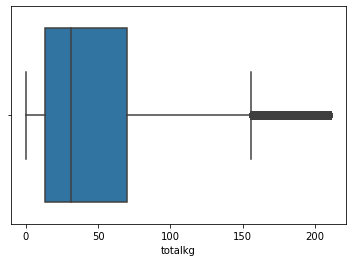

In [182]:
print(df_iqr.totalkg.describe())
print('Se eliminaron', len(df_lagged_roll_mean_agg) - len(df_iqr), 'filas')
fig = sns.boxplot(x=df_iqr.totalkg)

In [183]:
#Deteccion por percentiles de 0.99 y 0.01
df_quantile_01 = outliers_quantile(df_lagged_roll_mean_agg, 'totalkg')
df_quantile_01

,mes,anio,sku,marca,presentacion,categoria,unidadkg,id_proveedor,ubicacion,cantidad_pedida,presentacion_depurada,marca_depurada,categoria_depurada,cantidad_pedida_lag_t-1,cantidad_pedida_lag_t-2,cantidad_pedida_lag_t-3,cantidad_pedida_mean,cantidad_pedida_mean_w2,cantidad_pedida_mean_w3,poblacion_prov,densidad_prov,totalkg
0,4,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"25 De Mayo, 25 De Mayo, Buenos Aires",15.00,unidades,sin definir,impulsivos,65.00,60.00,50.00,15.00,15.62,15.42,17541141,57.00,48.24
1,4,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"3 De Febrero, 3 De Febrero, Buenos Aires",8.00,unidades,sin definir,impulsivos,10.00,10.00,18.00,4.00,3.67,4.11,17541141,57.00,25.73
2,4,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"3 De Febrero, Caseros, Buenos Aires",73.00,unidades,sin definir,impulsivos,96.00,82.00,128.00,9.12,10.56,10.46,17541141,57.00,234.77
3,4,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"3 De Febrero, Ciudadela, Buenos Aires",20.00,unidades,sin definir,impulsivos,55.00,35.00,2.00,20.00,23.75,21.67,17541141,57.00,64.32
4,4,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"3 De Febrero, Santos Lugares, Buenos Aires",55.00,unidades,sin definir,impulsivos,55.00,90.00,107.00,18.33,18.33,22.22,17541141,57.00,176.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766595,12,2019,995,SIN DEFINIR,Unidades,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",3.10,3,"Villa Ocampo, Santa Fe",4.00,unidades,sin definir,cucuruchos conos y vasos de pasta,2.00,3.00,3.00,2.00,2.00,2.33,3536418,27.00,12.40
766596,12,2019,995,SIN DEFINIR,Unidades,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",3.10,3,"Villa Pueyrredón, Capital Federal",2.00,unidades,sin definir,cucuruchos conos y vasos de pasta,1.00,2.00,4.00,2.00,1.50,1.67,3075646,15069.99,6.20
766597,12,2019,995,SIN DEFINIR,Unidades,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",3.10,3,"Yerba Buena, Tucumán",4.00,unidades,sin definir,cucuruchos conos y vasos de pasta,3.00,1.00,2.00,2.00,1.75,1.50,1694656,64.00,12.40
766598,12,2019,995,SIN DEFINIR,Unidades,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",3.10,3,"Zapala, Neuquén",7.00,unidades,sin definir,cucuruchos conos y vasos de pasta,5.00,6.00,10.00,3.50,4.25,4.83,664057,7.10,21.70


count   751554.00
mean        82.76
std        126.07
min          0.04
25%         15.60
50%         39.00
75%         93.60
max       1027.20
Name: totalkg, dtype: float64
Se eliminaron 15046 filas


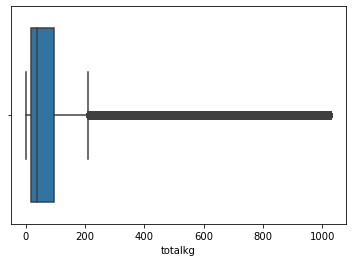

In [184]:
print(df_quantile_01.totalkg.describe())
print('Se eliminaron', len(df_lagged_roll_mean_agg) - len(df_quantile_01), 'filas')
fig = sns.boxplot(x=df_quantile_01.totalkg)

In [185]:
#Deteccion por percentiles de 0.995 y 0.005
df_quantile_005 = outliers_quantile(df_lagged_roll_mean_agg, 'totalkg', percentil=0.005)
df_quantile_005

,mes,anio,sku,marca,presentacion,categoria,unidadkg,id_proveedor,ubicacion,cantidad_pedida,presentacion_depurada,marca_depurada,categoria_depurada,cantidad_pedida_lag_t-1,cantidad_pedida_lag_t-2,cantidad_pedida_lag_t-3,cantidad_pedida_mean,cantidad_pedida_mean_w2,cantidad_pedida_mean_w3,poblacion_prov,densidad_prov,totalkg
0,4,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"25 De Mayo, 25 De Mayo, Buenos Aires",15.00,unidades,sin definir,impulsivos,65.00,60.00,50.00,15.00,15.62,15.42,17541141,57.00,48.24
1,4,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"3 De Febrero, 3 De Febrero, Buenos Aires",8.00,unidades,sin definir,impulsivos,10.00,10.00,18.00,4.00,3.67,4.11,17541141,57.00,25.73
2,4,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"3 De Febrero, Caseros, Buenos Aires",73.00,unidades,sin definir,impulsivos,96.00,82.00,128.00,9.12,10.56,10.46,17541141,57.00,234.77
3,4,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"3 De Febrero, Ciudadela, Buenos Aires",20.00,unidades,sin definir,impulsivos,55.00,35.00,2.00,20.00,23.75,21.67,17541141,57.00,64.32
4,4,2018,1021,SIN DEFINIR,Unidades,12 - IMPULSIVOS,3.22,2,"3 De Febrero, Santos Lugares, Buenos Aires",55.00,unidades,sin definir,impulsivos,55.00,90.00,107.00,18.33,18.33,22.22,17541141,57.00,176.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766595,12,2019,995,SIN DEFINIR,Unidades,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",3.10,3,"Villa Ocampo, Santa Fe",4.00,unidades,sin definir,cucuruchos conos y vasos de pasta,2.00,3.00,3.00,2.00,2.00,2.33,3536418,27.00,12.40
766596,12,2019,995,SIN DEFINIR,Unidades,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",3.10,3,"Villa Pueyrredón, Capital Federal",2.00,unidades,sin definir,cucuruchos conos y vasos de pasta,1.00,2.00,4.00,2.00,1.50,1.67,3075646,15069.99,6.20
766597,12,2019,995,SIN DEFINIR,Unidades,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",3.10,3,"Yerba Buena, Tucumán",4.00,unidades,sin definir,cucuruchos conos y vasos de pasta,3.00,1.00,2.00,2.00,1.75,1.50,1694656,64.00,12.40
766598,12,2019,995,SIN DEFINIR,Unidades,"0004 - CUCURUCHOS , CONOS Y VASOS DE PASTA",3.10,3,"Zapala, Neuquén",7.00,unidades,sin definir,cucuruchos conos y vasos de pasta,5.00,6.00,10.00,3.50,4.25,4.83,664057,7.10,21.70


count   762798.00
mean        87.79
std        150.25
min          0.01
25%         15.60
50%         39.00
75%         93.60
max       1547.68
Name: totalkg, dtype: float64
Se eliminaron 3802 filas


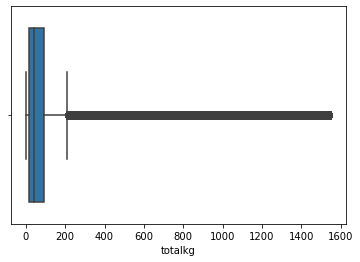

In [186]:
print(df_quantile_005.totalkg.describe())
print('Se eliminaron', len(df_lagged_roll_mean_agg) - len(df_quantile_005), 'filas')
fig = sns.boxplot(x=df_quantile_005.totalkg)

In [187]:
# hay que elegir un metodo y asignarlo a df_to_encode
df_to_encode = df_quantile_005

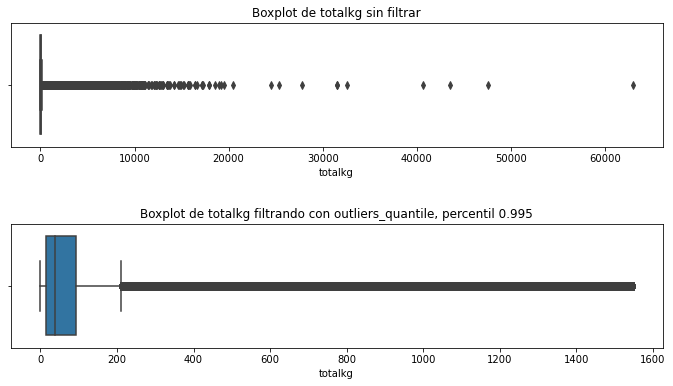

In [188]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize = (10,6))
sns.boxplot(x=df_lagged_roll_mean_agg.totalkg, ax=ax1)
ax1.set_title('Boxplot de totalkg sin filtrar')
sns.boxplot(x=df_quantile_005.totalkg, ax=ax2)
ax2.set_title('Boxplot de totalkg filtrando con ' + outliers_quantile.__name__ + ', percentil 0.995')
fig.tight_layout(pad=3.0)

#### 5.2 One Hot Encoding. Creación variables dummies

Generar variables dummies para aquellas features de tipo objects que considere pueden aportar a los futuros modelos de machine learning.  Las features que seleccione aqui pueden no ser las definitivas pues pueden ser consideradas mas adelante nuevas features en el proceso circular de un proyecto de machine learning . Puede utilizar pandas.get_dummies o sklearn.preprocessing.OneHotEncoder para este propósito. Algunos ejemplos de columnas candidatas a ser columnas dummies son marca, categoria, presentación, provincias-localidad y sku. 

**Nota:** la generación de dummies para provincia-localidad y sku generará una gran cantidade columnas. A fines de reducir la cantidad de columnas para estas dos features generar solo dummies de las top N mas frecuentes. Adicionar una nueva variable que sea otras_localidades y otros_sku para indicar aquellas ventas que no se realizan en las localidades o con los sku mas frecuentes o no estan en el top N antes mencionado. Seleccione el parámetro N que considere representativo.

##### Reducción de Ubicación y SKU

In [189]:
#Deja los top n valores en frecuencia y el resto los pone en otros
def top_n(df, col, n):
    
    frec = df[col].value_counts()
    frec = frec.to_frame()
    top = list(frec.index)[:n]
    new_col = []
    
    for value in df[col]:
        if value in top:
            new_col.append(value)
        else:
            new_col.append('otros')
    
    ret = df.copy()
    ret[col] = new_col
    return ret
       
# Deja los valores que representan el X% de las ventas (o el top n_max si lo anterior lo supera)
def top_porcentaje(df, col, porcentaje, n_max=100):
    
    s = (len(df)*porcentaje)//100
    frec = df[col].value_counts()
    frec = frec.to_frame('frec')
    suma = 0
    i = 0
    while suma < s:
        suma = suma + frec.frec[i]
        i = i + 1
    if i > n_max:
        ret = top_n(df, col, n_max)
        porcentaje_real = (sum(frec.frec[:n_max])/len(df))*100
    else:
        ret = top_n(df, col, i)
        porcentaje_real = (suma/len(df))*100
    return ret, porcentaje_real

In [190]:
df_onehot = df_to_encode.drop(columns=['presentacion', 'marca', 'categoria'])
df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762798 entries, 0 to 766599
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   mes                      762798 non-null  object 
 1   anio                     762798 non-null  object 
 2   sku                      762798 non-null  object 
 3   unidadkg                 762798 non-null  float64
 4   id_proveedor             762798 non-null  object 
 5   ubicacion                762798 non-null  object 
 6   cantidad_pedida          762798 non-null  float64
 7   presentacion_depurada    762798 non-null  object 
 8   marca_depurada           762798 non-null  object 
 9   categoria_depurada       762798 non-null  object 
 10  cantidad_pedida_lag_t-1  762798 non-null  float64
 11  cantidad_pedida_lag_t-2  762798 non-null  float64
 12  cantidad_pedida_lag_t-3  762798 non-null  float64
 13  cantidad_pedida_mean     762798 non-null  float64
 14  cant

In [191]:
#Filtramos el 80% de sku y las 100 top localidades
df_top, _ = top_porcentaje(df_onehot, 'sku', 60)
df_top = top_n(df_top, 'ubicacion', n=80)

In [192]:
#Vemos sku y ubicacion post reduccion
print('SKU original',df_onehot.sku.nunique())
print('SKU top',df_top.sku.nunique())
print('Ubicacion original',df_onehot.ubicacion.nunique())
print('Ubicacion top',df_top.ubicacion.nunique())

SKU original 254
SKU top 53
Ubicacion original 653
Ubicacion top 81


In [193]:
#Total columnas (categoricas y continuas) para el OneHotEncoding
feature_cols = list(df_onehot.columns) 
 
#Columnas por separado para el OneHotEncoder
cols_categoricas =  ['mes', 'anio', 'sku', 'id_proveedor', 'ubicacion', 'presentacion_depurada', 'marca_depurada', 'categoria_depurada']
cols_continuas =  ['unidadkg', 'cantidad_pedida', 'cantidad_pedida_lag_t-1', 'cantidad_pedida_lag_t-2', 'cantidad_pedida_lag_t-3',
                  'cantidad_pedida_mean', 'cantidad_pedida_mean_w2', 'cantidad_pedida_mean_w3', 'poblacion_prov', 'densidad_prov', 'totalkg']

In [194]:
print('Total columnas y filas', df_top[feature_cols].shape)
print('Total columnas categoricas', df_top[cols_categoricas].shape[1])
print('Total columnas continuas', df_top[cols_continuas].shape[1])

Total columnas y filas (762798, 19)
Total columnas categoricas 8
Total columnas continuas 11


In [195]:
#Filtro dataset (para probar correr onehot encoding)
df_top_sample = df_top.sample(100000, random_state=1)
df_top_sample

,mes,anio,sku,unidadkg,id_proveedor,ubicacion,cantidad_pedida,presentacion_depurada,marca_depurada,categoria_depurada,cantidad_pedida_lag_t-1,cantidad_pedida_lag_t-2,cantidad_pedida_lag_t-3,cantidad_pedida_mean,cantidad_pedida_mean_w2,cantidad_pedida_mean_w3,poblacion_prov,densidad_prov,totalkg
596317,11,2018,otros,0.21,3,"San Fernando Del Valle De Catamarca, Catamarca",2.00,no asignada,via bana,productos via bana tipo b,1.00,1.00,1.00,2.00,1.50,1.33,415438,4.00,0.42
290525,7,2019,otros,2.10,2,otros,3.00,pack,sin definir,grido cafe,1.00,3.00,1.00,1.50,1.25,1.33,1694656,64.00,6.30
373972,8,2019,909,4.14,2,otros,6.00,kilogramos,grido,pote lts,2.00,2.00,2.00,1.50,1.25,1.17,17541141,57.00,24.84
660770,11,2019,890,9.60,2,otros,15.00,kilogramos,grido,familiar,30.00,39.00,6.00,15.00,15.00,14.33,1990338,13.00,144.00
184457,6,2019,1707,7.80,2,otros,5.00,baldes,grido,sabores especiales,6.00,6.00,6.00,5.00,4.00,4.67,17541141,57.00,39.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125748,5,2019,otros,6.08,2,otros,2.00,pack,frizzio,frizzio,2.00,2.00,3.00,2.00,2.00,2.00,3536418,27.00,12.16
49300,4,2019,1714,7.80,2,otros,2.00,baldes,grido,sabores comunes,1.00,5.00,8.00,2.00,1.50,1.56,3760450,23.00,15.60
108798,5,2018,910,4.14,2,otros,33.00,kilogramos,grido,pote lts,24.00,20.00,6.00,16.50,12.25,11.50,1694656,64.00,136.62
296407,8,2018,1692,7.80,2,otros,3.00,baldes,grido,sabores comunes,3.00,5.00,1.00,1.50,1.25,2.50,3760450,23.00,23.40


##### OneHotEncoder

In [196]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)#True
encoder.fit(df_top_sample[cols_categoricas])
ohe_cat = encoder.transform(df_top_sample[cols_categoricas])
#encoder.categories_ #Ver que categorias que existen

In [197]:
ohe_cat.shape

(100000, 182)

In [198]:
matrix_size_1 = ohe_cat.shape[0] * ohe_cat.shape[1] * 4 / 1024 / 1024
print("The dense matrix will weight approximately {:.2f} MB".format(matrix_size_1))

The dense matrix will weight approximately 69.43 MB


In [199]:
#Variables continuas
ohe_num = np.array(df_top_sample[cols_continuas])
ohe_num.shape

(100000, 11)

In [200]:
#Uso de hstack para unir variables continuas y categoricas
ohe_all = np.hstack((ohe_num,ohe_cat))
ohe_all.shape

(100000, 193)

##### DictVectorizer

In [201]:
#Convierto el conjunto de datos a una lista de diccionarios
feature_dict = list(df_top_sample[feature_cols].T.to_dict().values()) 
feature_dict[:1]

[{'mes': '11',
  'anio': '2018',
  'sku': 'otros',
  'unidadkg': 0.2099999999999999,
  'id_proveedor': '3',
  'ubicacion': 'San Fernando Del Valle De Catamarca, Catamarca',
  'cantidad_pedida': 2.0,
  'presentacion_depurada': 'no asignada',
  'marca_depurada': 'via bana',
  'categoria_depurada': 'productos via bana  tipo b',
  'cantidad_pedida_lag_t-1': 1.0,
  'cantidad_pedida_lag_t-2': 1.0,
  'cantidad_pedida_lag_t-3': 1.0,
  'cantidad_pedida_mean': 2.0,
  'cantidad_pedida_mean_w2': 1.499999999999737,
  'cantidad_pedida_mean_w3': 1.3333333333332575,
  'poblacion_prov': 415438,
  'densidad_prov': 4.0,
  'totalkg': 0.4199999999999998}]

In [202]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
feature_matrix = vec.fit_transform(feature_dict)
feature_matrix

<100000x193 sparse matrix of type '<class 'numpy.float64'>'
	with 1900000 stored elements in Compressed Sparse Row format>

In [203]:
len(vec.get_feature_names())

193

In [204]:
matrix_size_2 = feature_matrix.shape[0] * feature_matrix.shape[1] * 4 / 1024 / 1024
print("The dense matrix will weight approximately {:.2f} MB".format(matrix_size_2))

The dense matrix will weight approximately 73.62 MB


In [205]:
from scipy.sparse import csr_matrix

def save_sparse_csr(filename, array):
    # note that .npz extension is added automatically
    np.savez(filename, data=array.data, indices=array.indices,
             indptr=array.indptr, shape=array.shape)

def load_sparse_csr(filename):
    # here we need to add .npz extension manually
    loader = np.load(filename + '.npz')
    return csr_matrix((loader['data'], loader['indices'], loader['indptr']),
                      shape=loader['shape'])

In [206]:
save_sparse_csr('dataset/feature_matrix', feature_matrix)
prueba = load_sparse_csr('dataset/feature_matrix')
prueba

<100000x193 sparse matrix of type '<class 'numpy.float64'>'
	with 1900000 stored elements in Compressed Sparse Row format>